# Progetto di IUM
### Mangini Dario, 2024-2025

### Importazione delle librerie e creazione dei dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import geopandas as gpd
import folium

df_movies = pd.read_csv('data/main_data/movies.csv')
df_actors = pd.read_csv('data/main_data/actors.csv')
df_countries = pd.read_csv('data/main_data/countries.csv')
df_crew = pd.read_csv('data/main_data/crew.csv')
df_genres = pd.read_csv('data/main_data/genres.csv')
df_languages = pd.read_csv('data/main_data/languages.csv')
df_posters = pd.read_csv('data/main_data/posters.csv')
df_releases = pd.read_csv('data/main_data/releases.csv')
df_studios = pd.read_csv('data/main_data/studios.csv')
df_themes = pd.read_csv('data/main_data/themes.csv')

df_rotten = pd.read_csv('data/additional_data/rotten_tomatoes_reviews.csv')
df_oscar = pd.read_csv('data/additional_data/the_oscar_awards.csv')

# Primo controllo e pulizia dei dati per ogni dataset

## 1. Movies.csv

### Prima visualizzazione dei dati di movies

In [2]:
df_movies

id                               name    date  \
0       1000001                             Barbie  2023.0   
1       1000002                           Parasite  2019.0   
2       1000003  Everything Everywhere All at Once  2022.0   
3       1000004                         Fight Club  1999.0   
4       1000005                         La La Land  2016.0   
...         ...                                ...     ...   
941592  1941593                                 神笛     NaN   
941593  1941594                      蟲極道蜜団子抗争編 壱ノ巻     NaN   
941594  1941595                      蟲極道蜜団子抗争編 弐ノ巻     NaN   
941595  1941596                                 重生     NaN   
941596  1941597                             青ひげ公の城     NaN   

                                                 tagline  \
0                       She's everything. He's just Ken.   
1                            Act like you own the place.   
2       The universe is so much bigger than you realize.   
3                                Mischief. Mayhem. Soap.   
4                         Here's to the fools who dream.   
...                                                  ...   
941592                                               NaN   
941593                                               NaN   
941594                                               NaN   
941595                                               NaN   
941596                                               NaN   

                                              description  minute  rating  
0       Barbie and Ken are having the time of their li...   114.0    3.86  
1       All unemployed, Ki-taek's family takes peculia...   133.0    4.56  
2       An aging Chinese immigrant is swept up in an i...   140.0    4.30  
3       A ticking-time-bomb insomniac and a slippery s...   139.0    4.27  
4       Mia, an aspiring actress, serves lattes to mov...   129.0    4.09  
...                                                   ...     ...     ...  
941592                                                NaN     NaN     NaN  
941593  Shinjuku forest at night. In the sap taverns o...    30.0     NaN  
941594  The city that never sleeps, where insects gath...    30.0     NaN  
941595  In a world where order has broken down, darkne...     NaN     NaN  
941596                                                NaN   130.0     NaN  

[941597 rows x 7 columns]

In [3]:
df_movies.shape

(941597, 7)

In [4]:
df_movies.dtypes

id               int64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
dtype: object

Faccio una copia del dataframe, che altrimenti potrebbe casuare problemi con altre operazioni in seguito

In [5]:
df_movies_clean = df_movies.copy()

### Visualizzazione e gestione dei dati nulli per movies

In [6]:
# Conta i valori mancanti per colonna
print(df_movies_clean.isnull().sum())

id                  0
name               10
date            91913
tagline        802210
description    160812
minute         181570
rating         850598
dtype: int64


In [7]:
# Filtra le righe con valori mancanti
df_movies_clean[df_movies_clean.isna().any(axis=1)]

id                 name    date tagline  \
34      1000035           Black Swan  2010.0     NaN   
68      1000069           Past Lives  2023.0     NaN   
133     1000134            Toy Story  1995.0     NaN   
146     1000147  Requiem for a Dream  2000.0     NaN   
162     1000163        Asteroid City  2023.0     NaN   
...         ...                  ...     ...     ...   
941592  1941593                   神笛     NaN     NaN   
941593  1941594        蟲極道蜜団子抗争編 壱ノ巻     NaN     NaN   
941594  1941595        蟲極道蜜団子抗争編 弐ノ巻     NaN     NaN   
941595  1941596                   重生     NaN     NaN   
941596  1941597               青ひげ公の城     NaN     NaN   

                                              description  minute  rating  
34      A journey through the psyche of a young baller...   108.0    4.15  
68      Nora and Hae Sung, two childhood friends, are ...   106.0    4.18  
133     Led by Woody, Andy's toys live happily in his ...    81.0    4.12  
146     The hopes and dreams of four ambitious people ...   102.0    4.10  
162     Set in a fictional American desert town circa ...   105.0    3.52  
...                                                   ...     ...     ...  
941592                                                NaN     NaN     NaN  
941593  Shinjuku forest at night. In the sap taverns o...    30.0     NaN  
941594  The city that never sleeps, where insects gath...    30.0     NaN  
941595  In a world where order has broken down, darkne...     NaN     NaN  
941596                                                NaN   130.0     NaN  

[903289 rows x 7 columns]

In [8]:
# Seleziona le righe dove 'name' è NaN
righe_con_na = df_movies_clean[df_movies_clean['name'].isna()]
righe_con_na

id name    date tagline  \
287514  1287515  NaN  2015.0     NaN   
617642  1617643  NaN     NaN     NaN   
646520  1646521  NaN  2008.0     NaN   
648185  1648186  NaN     NaN     NaN   
720294  1720295  NaN     NaN     NaN   
725369  1725370  NaN     NaN     NaN   
741481  1741482  NaN     NaN     NaN   
840337  1840338  NaN     NaN     NaN   
883228  1883229  NaN     NaN     NaN   
894771  1894772  NaN     NaN     NaN   

                                              description  minute  rating  
287514  NONE is a short film that explores the balance...     4.0     NaN  
617642                                                NaN     NaN     NaN  
646520                                                NaN     NaN     NaN  
648185                                                NaN     NaN     NaN  
720294  In this directorial debut of Eden Ewardson, he...     8.0     NaN  
725369                                                NaN     NaN     NaN  
741481                                                NaN    90.0     NaN  
840337                                                NaN     NaN     NaN  
883228                                                NaN     NaN     NaN  
894771                                                NaN     NaN     NaN

Rimuovo le righe dove name è null perché non mi utile tenere film di cui non so neanche il nome

In [9]:
# Rimuove righe con valori nulli nella colonna 'name'
df_movies_clean = df_movies_clean.dropna(subset=['name'])

In [10]:
# Seleziona le righe dove 'date' è NaN
righe_con_na = df_movies_clean[df_movies_clean['date'].isna()]
righe_con_na

id                                    name  date tagline  \
3529    1003530     Spider-Man: Beyond the Spider-Verse   NaN     NaN   
5493    1005494  Wake Up Dead Man: A Knives Out Mystery   NaN     NaN   
7119    1007120          My Year of Rest and Relaxation   NaN     NaN   
7914    1007915                            Frankenstein   NaN     NaN   
8110    1008111                  Mad Max: The Wasteland   NaN     NaN   
...         ...                                     ...   ...     ...   
941592  1941593                                      神笛   NaN     NaN   
941593  1941594                           蟲極道蜜団子抗争編 壱ノ巻   NaN     NaN   
941594  1941595                           蟲極道蜜団子抗争編 弐ノ巻   NaN     NaN   
941595  1941596                                      重生   NaN     NaN   
941596  1941597                                  青ひげ公の城   NaN     NaN   

                                              description  minute  rating  
3529    Taking place right after the events of Spider-...     NaN     NaN  
5493    Benoit Blanc returns in his most dangerous cas...     NaN     NaN  
7119    Bored with her seemingly meaningless life, a y...     NaN     NaN  
7914    Dr. Victor Frankenstein, a brilliant but egoti...     NaN     NaN  
8110    Mad Max: The Wasteland is an upcoming film in ...     NaN     NaN  
...                                                   ...     ...     ...  
941592                                                NaN     NaN     NaN  
941593  Shinjuku forest at night. In the sap taverns o...    30.0     NaN  
941594  The city that never sleeps, where insects gath...    30.0     NaN  
941595  In a world where order has broken down, darkne...     NaN     NaN  
941596                                                NaN   130.0     NaN  

[91905 rows x 7 columns]

Di sopra possiamo dedurre che i film che non hanno una data sono film che devono ancora uscire, per cui possiamo sostituire un valore simbolico come zero per ricordarci di questo fatto in seguito.

In [11]:
# Sostituisce i valori NaN nella colonna 'date' con 0
df_movies_clean['date'] = df_movies_clean['date'].fillna(0)

Per le righe dove tagline e description sono nulli non ho interesse a modificare il valore perché dubito che possano essere utilizzati durante l'analisi successivamente.

In [12]:
# Seleziona le righe dove 'minute' è NaN
righe_con_na = df_movies_clean[df_movies_clean['minute'].isna()]
righe_con_na

id                                    name    date  \
2572    1002573                               Nosferatu  2024.0   
3529    1003530     Spider-Man: Beyond the Spider-Verse     0.0   
4679    1004680                    The Batman - Part II  2026.0   
5493    1005494  Wake Up Dead Man: A Knives Out Mystery     0.0   
5554    1005555                                  Wicked  2024.0   
...         ...                                     ...     ...   
941589  1941590                     機動戦士ガンダムUC: ユニコーンの日     0.0   
941590  1941591                                 火线干探之革命     0.0   
941591  1941592                                 画江湖之不良人     0.0   
941592  1941593                                      神笛     0.0   
941595  1941596                                      重生     0.0   

                                   tagline  \
2572                                   NaN   
3529                                   NaN   
4679                                   NaN   
5493                                   NaN   
5554    Everyone deserves a chance to fly.   
...                                    ...   
941589                                 NaN   
941590                                 NaN   
941591                                 NaN   
941592                                 NaN   
941595                                 NaN   

                                              description  minute  rating  
2572    A gothic tale of obsession between a haunted y...     NaN     NaN  
3529    Taking place right after the events of Spider-...     NaN     NaN  
4679                  Sequel to the 2022 film The Batman.     NaN     NaN  
5493    Benoit Blanc returns in his most dangerous cas...     NaN     NaN  
5554    Elphaba, an ostracized but defiant girl born w...     NaN     NaN  
...                                                   ...     ...     ...  
941589                                                NaN     NaN     NaN  
941590                                                NaN     NaN     NaN  
941591                                                NaN     NaN     NaN  
941592                                                NaN     NaN     NaN  
941595  In a world where order has broken down, darkne...     NaN     NaN  

[181563 rows x 7 columns]

Nelle righe dove minute (la durata) ha valore nullo sostituisco come valore simbolico -1.

In [13]:
# Sostituisce i valori NaN nella colonna 'minute' con -1
df_movies_clean['minute'] = df_movies_clean['minute'].fillna(-1)

In [14]:
# Seleziona le righe dove 'rating' è NaN
righe_con_na = df_movies_clean[df_movies_clean['rating'].isna()]
righe_con_na

id                                 name    date  \
2532    1002533                             MaXXXine  2024.0   
2572    1002573                            Nosferatu  2024.0   
3257    1003258                 Deadpool & Wolverine  2024.0   
3348    1003349                  Joker: Folie à Deux  2024.0   
3529    1003530  Spider-Man: Beyond the Spider-Verse     0.0   
...         ...                                  ...     ...   
941592  1941593                                   神笛     0.0   
941593  1941594                        蟲極道蜜団子抗争編 壱ノ巻     0.0   
941594  1941595                        蟲極道蜜団子抗争編 弐ノ巻     0.0   
941595  1941596                                   重生     0.0   
941596  1941597                               青ひげ公の城     0.0   

                       tagline  \
2532    Hollywood is a killer.   
2572                       NaN   
3257            Come together.   
3348     The world is a stage.   
3529                       NaN   
...                        ...   
941592                     NaN   
941593                     NaN   
941594                     NaN   
941595                     NaN   
941596                     NaN   

                                              description  minute  rating  
2532    In 1980s Hollywood, adult film star and aspiri...   104.0     NaN  
2572    A gothic tale of obsession between a haunted y...    -1.0     NaN  
3257    A listless Wade Wilson toils away in civilian ...   127.0     NaN  
3348                     A sequel to the 2019 film Joker.   120.0     NaN  
3529    Taking place right after the events of Spider-...    -1.0     NaN  
...                                                   ...     ...     ...  
941592                                                NaN    -1.0     NaN  
941593  Shinjuku forest at night. In the sap taverns o...    30.0     NaN  
941594  The city that never sleeps, where insects gath...    30.0     NaN  
941595  In a world where order has broken down, darkne...    -1.0     NaN  
941596                                                NaN   130.0     NaN  

[850588 rows x 7 columns]

Nelle righe dove rating (la valutazione) è nulla sostituisco come valore simbolico -1


In [15]:
# Sostituisce i valori NaN nella colonna 'rating' con -1
df_movies_clean['rating'] = df_movies_clean['rating'].fillna(-1)

### Controllo e gestione dei valori duplicati per movies


In [16]:
# Trova i duplicati completi
duplicates = df_movies_clean[df_movies_clean.duplicated()]

duplicates

Empty DataFrame
Columns: [id, name, date, tagline, description, minute, rating]
Index: []

In [17]:
# Trova i duplicati in base al nome
duplicates = df_movies_clean[df_movies_clean.duplicated(subset=['name'])]

duplicates

id                  name    date  \
389     1000390                Scream  2022.0   
453     1000454              Suspiria  2018.0   
473     1000474            Mean Girls  2024.0   
668     1000669    The Little Mermaid  1989.0   
704     1000705  Beauty and the Beast  2017.0   
...         ...                   ...     ...   
941512  1941513           Untouchable     0.0   
941514  1941515              Vagabond     0.0   
941524  1941525                 Waste     0.0   
941532  1941533               Without     0.0   
941534  1941535                wolves     0.0   

                                                  tagline  \
389                         It's always someone you know.   
453                          Give your soul to the dance.   
473                                   Plastic is forever.   
668     Somewhere under the sea and beyond your imagin...   
704                                         Be our guest.   
...                                                   ...   
941512                                                NaN   
941514                                                NaN   
941524                                                NaN   
941532                                                NaN   
941534                                             wolves   

                                              description  minute  rating  
389     Twenty-five years after a streak of brutal mur...   114.0    3.21  
453     A darkness swirls at the center of a world-ren...   152.0    3.74  
473     New student Cady Heron is welcomed into the to...   113.0    2.69  
668     This colorful adventure tells the story of an ...    83.0    3.67  
704     A live-action adaptation of Disney's version o...   129.0    3.07  
...                                                   ...     ...     ...  
941512  Zun Fei (Shen Teng) with a group of brothers t...    -1.0   -1.00  
941514  ... shot at the "Love-In" held in Elysian Park...     6.0   -1.00  
941524  When Orel learns that God hates waste he decid...    11.0   -1.00  
941532                                                NaN     6.0   -1.00  
941534  Naji), (Makram), and (Ezzat) are three friends...   113.0   -1.00  

[146166 rows x 7 columns]

In [18]:
# Filtra le righe dove il valore della colonna 'name' è uguale a 'Scream'
scream_rows = df_movies_clean.loc[df_movies_clean['name'] == 'Scream']

# Visualizza le righe trovate
print("Righe con il nome 'Scream':")
scream_rows

Righe con il nome 'Scream':


id    name    date  \
122     1000123  Scream  1996.0   
389     1000390  Scream  2022.0   
28275   1028276  Scream  1981.0   
143379  1143380  Scream  1978.0   
149643  1149644  Scream  1949.0   
251118  1251119  Scream  2007.0   
359087  1359088  Scream  2023.0   
414221  1414222  Scream  1964.0   
431991  1431992  Scream  2021.0   
504961  1504962  Scream  2018.0   
505518  1505519  Scream  1997.0   
544688  1544689  Scream  2019.0   
581197  1581198  Scream  2009.0   
714324  1714325  Scream  1977.0   
734675  1734676  Scream  1986.0   
781956  1781957  Scream  1999.0   

                                                  tagline  \
122     Someone has taken their love of scary movies o...   
389                         It's always someone you know.   
28275   It was the perfect weekend vacation until THE ...   
143379                                                NaN   
149643                                                NaN   
251118                                                NaN   
359087                                                NaN   
414221                                                NaN   
431991                                                NaN   
504961                                                NaN   
505518                 Sometimes you just want to scream.   
544688                                                NaN   
581197                                                NaN   
714324                                                NaN   
734675                                                NaN   
781956                                                NaN   

                                              description  minute  rating  
122     A killer known as Ghostface begins killing off...   112.0    4.02  
389     Twenty-five years after a streak of brutal mur...   114.0    3.21  
28275   A group of people on a rafting excursion happe...    82.0    2.18  
143379  Film consists of shots of Belgrade Zoo, animal...     9.0   -1.00  
149643  Scream, called the first Turkish horror/thrill...    85.0   -1.00  
251118  A group of new students register to be members...    92.0   -1.00  
359087  Mels, who was born without legs, lives in a sm...   108.0   -1.00  
414221                                                NaN    98.0   -1.00  
431991  An experimental essay film about terrorism, me...    47.0   -1.00  
504961                         Mongolian horror anthology    80.0   -1.00  
505518  MS-DOS demoscene short film that showcases com...     3.0   -1.00  
544688  A man wants to report that he has been raped b...    12.0   -1.00  
581197  It is the expressive face of a young gir  Caro...     7.0   -1.00  
714324  After having sex with his girlfriend, Michi no...     5.0   -1.00  
734675  The film examines the problems of the confront...    72.0   -1.00  
781956                                   Hong Kong flick.    86.0   -1.00

Dall'esempio di sopra possiamo capire che solo il nome non basta per capire se un duplicato si può eliminare, dato che ci possono essere film con lo stesso nome ma fatti in anni diversi.

In [19]:
# Trova tutte le occorrenze duplicate nella colonna "name" e "date"
duplicati_name_date = df_movies_clean[df_movies_clean.duplicated(subset=['name', 'date'], keep=False)]

print("Tutte le occorrenze duplicate nella colonna 'name' e 'date':")
duplicati_name_date

Tutte le occorrenze duplicate nella colonna 'name' e 'date':


id              name    date  \
0       1000001            Barbie  2023.0   
58      1000059       Taxi Driver  1976.0   
63      1000064           Arrival  2016.0   
68      1000069        Past Lives  2023.0   
85      1000086                Us  2019.0   
...         ...               ...     ...   
941505  1941506           Unravel     0.0   
941510  1941511  Untitled Project     0.0   
941514  1941515          Vagabond     0.0   
941524  1941525             Waste     0.0   
941532  1941533           Without     0.0   

                                                  tagline  \
0                        She's everything. He's just Ken.   
58      On every street in every city, there's a nobod...   
63                                     Why are they here?   
68                                                    NaN   
85                                         Watch yourself   
...                                                   ...   
941505  Alexia, a young woman who struggles with anxie...   
941510                                                NaN   
941514                                                NaN   
941524                                                NaN   
941532                                                NaN   

                                              description  minute  rating  
0       Barbie and Ken are having the time of their li...   114.0    3.86  
58      A mentally unstable Vietnam War veteran works ...   114.0    4.17  
63      Taking place after alien crafts land around th...   116.0    4.12  
68      Nora and Hae Sung, two childhood friends, are ...   106.0    4.18  
85      Husband and wife Gabe and Adelaide Wilson take...   116.0    3.65  
...                                                   ...     ...     ...  
941505  Along her journey to relieve herself of anxiet...     7.0   -1.00  
941510         A narrator is simply trying to do his job.    -1.0   -1.00  
941514  ... shot at the "Love-In" held in Elysian Park...     6.0   -1.00  
941524  When Orel learns that God hates waste he decid...    11.0   -1.00  
941532                                                NaN     6.0   -1.00  

[41173 rows x 7 columns]

Elimino i dati dove nome e data sono uguali per l'improbabilità che venga fatto un film con lo stesso nome nello stesso anno.

In [20]:
# Rimuovo i duplicati basandoti su 'name' e 'date', mantenendo la prima occorrenza
df_movies_clean = df_movies_clean.drop_duplicates(subset=['name', 'date'])

### Conversione e ultime operazioni per movies

In [21]:
# Conversione delle colonne in stringhe
df_movies_clean['name'] = df_movies_clean['name'].astype(str)
df_movies_clean['tagline'] = df_movies_clean['tagline'].astype(str)
df_movies_clean['description'] = df_movies_clean['description'].astype(str)
# Rinomina la colonna 'date' in 'year'
df_movies_clean = df_movies_clean.rename(columns={'date': 'year'})
#conversione year in formato intero perché se lo converto in data mi aggiunge giorne e mese
df_movies_clean['year'] = df_movies_clean['year'].astype(int)
#Conversione della colonna in intero
df_movies_clean['minute'] = df_movies_clean['minute'].astype(int)

In [22]:
df_movies_clean.head()

id                               name  year  \
0  1000001                             Barbie  2023   
1  1000002                           Parasite  2019   
2  1000003  Everything Everywhere All at Once  2022   
3  1000004                         Fight Club  1999   
4  1000005                         La La Land  2016   

                                            tagline  \
0                  She's everything. He's just Ken.   
1                       Act like you own the place.   
2  The universe is so much bigger than you realize.   
3                           Mischief. Mayhem. Soap.   
4                    Here's to the fools who dream.   

                                         description  minute  rating  
0  Barbie and Ken are having the time of their li...     114    3.86  
1  All unemployed, Ki-taek's family takes peculia...     133    4.56  
2  An aging Chinese immigrant is swept up in an i...     140    4.30  
3  A ticking-time-bomb insomniac and a slippery s...     139    4.27  
4  Mia, an aspiring actress, serves lattes to mov...     129    4.09

In [23]:
df_movies_clean.columns

Index(['id', 'name', 'year', 'tagline', 'description', 'minute', 'rating'], dtype='object')

## 2. Actors.csv

### Prima visualizzazione dei dati di Actors

In [24]:
df_actors

id               name                 role
0        1000001      Margot Robbie               Barbie
1        1000001       Ryan Gosling                  Ken
2        1000001    America Ferrera               Gloria
3        1000001  Ariana Greenblatt                Sasha
4        1000001           Issa Rae               Barbie
...          ...                ...                  ...
5798445  1941596            Marc Ma            Ba Cai/巴莱
5798446  1941596                线雨轩              Tata/塔塔
5798447  1941596       Jiang Yixuan  Zuo Yila（Zoila）/佐伊拉
5798448  1941597     Hiroshi Mikami                  NaN
5798449  1941597      Keiko Oginome                  NaN

[5798450 rows x 3 columns]

In [25]:
df_actors.dtypes

id       int64
name    object
role    object
dtype: object

Faccio una copia del dataframe, che altrimenti potrebbe casuare problemi con altre operazioni in seguito

In [26]:
df_actors_clean = df_actors.copy()

### Controllo e gestione dei valori nulli per Actors

In [27]:
# Conta i valori mancanti per colonna
print(df_actors_clean.isnull().sum())

id            0
name          4
role    1361559
dtype: int64


In [28]:
# Seleziona le righe dove 'name' è NaN
righe_con_na = df_actors_clean[df_actors_clean['name'].isna()]
righe_con_na

id name            role
4145738  1443629  NaN             NaN
4281100  1469981  NaN            Self
4306960  1474958  NaN  Cinematography
5430275  1773264  NaN             NaN

Elimino le righe dove il nome è nullo perché non sono utili e sono poche.

In [29]:
# Rimuove righe con valori nulli nella colonna 'name'
df_actors_clean = df_actors_clean.dropna(subset=['name'])

### Controllo e gestione dei valori duplicati per Actors


In [30]:
# Verifica le righe duplicate considerando tutte le colonne
duplicati = df_actors_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_actors_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 946
Righe duplicate:


id               name                         role
3993     1000062        Rosie Jones   Lady of the Boot of Jemiah
44642    1000797     Karel Heřmánek            Czech Injured Man
47807    1000863  Michael Fennimore                 Car Salesman
117813   1002509   Isabel Rodriguez                       Dancer
125321   1002704        Harry Sabin  Additional Muppet Performer
...          ...                ...                          ...
5788300  1935883   Denis Lovrinović                          NaN
5791298  1937512        David Livet                          NaN
5791299  1937512        David Livet                          NaN
5792884  1939290  Gudni Oddgeirsson                  Interviewee
5795228  1940468       Ann Victorin                 other voices

[946 rows x 3 columns]

In [31]:
# Elimina i duplicati nel DataFrame
df_actors_clean = df_actors_clean.drop_duplicates()

### Conversione e ultime operazioni per Actors

In [32]:
df_actors_clean['name'] = df_actors_clean['name'].astype(str)
df_actors_clean['role'] = df_actors_clean['role'].astype(str)

In [33]:
df_actors_clean = df_actors_clean.rename(columns={'id': 'film_id'})

In [34]:
df_actors_clean.head()

film_id               name    role
0  1000001      Margot Robbie  Barbie
1  1000001       Ryan Gosling     Ken
2  1000001    America Ferrera  Gloria
3  1000001  Ariana Greenblatt   Sasha
4  1000001           Issa Rae  Barbie

## 3. Countries.csv

### Prima visualizzazione dei dati di Countries

In [35]:
df_countries

id      country
0       1000001           UK
1       1000001          USA
2       1000002  South Korea
3       1000003          USA
4       1000004      Germany
...         ...          ...
693471  1941593        China
693472  1941594          USA
693473  1941595          USA
693474  1941596        China
693475  1941597        Japan

[693476 rows x 2 columns]

In [36]:
df_countries.dtypes

id          int64
country    object
dtype: object

In [37]:
df_countries.columns

Index(['id', 'country'], dtype='object')

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.

In [38]:
df_countries_clean = df_countries.copy()

### Controllo e gestione dei valori nulli per countries

In [39]:
# Conta i valori mancanti per colonna
print(df_countries_clean.isnull().sum())

id         0
country    0
dtype: int64


### Controllo e gestione dei valori duplicati per countries

In [40]:
# Verifica le righe duplicate considerando tutte le colonne
duplicati = df_countries_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_countries_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 0
Righe duplicate:


Empty DataFrame
Columns: [id, country]
Index: []

### Conversione e ultime operazioni per contries

In [41]:
df_countries_clean['country'] = df_countries_clean['country'].astype(str)
df_countries_clean = df_countries_clean.rename(columns={'id': 'film_id'})

df_countries_clean.head()

film_id      country
0  1000001           UK
1  1000001          USA
2  1000002  South Korea
3  1000003          USA
4  1000004      Germany

controllo che ci sia solo la dicitura 'UK' per rappresentare il Regno Unito e la dicitura 'USA' per gli Stati Uniti


In [42]:
# Definisci le varianti
varianti_uk = [
    'UK', 'GB', 'GBR', 'United Kingdom', 'Great Britain',
    'United Kingdom of Great Britain and Northern Ireland',
    'England', 'Scotland', 'Wales', 'Northern Ireland', 'Britain'
]

varianti_usa = [
    'USA', 'US', 'U.S.', 'U.S.A.', 'United States',
    'United States of America', 'America'
]

# Uniforma i valori usando una sostituzione diretta senza regex
df_countries_clean['country'] = df_countries_clean['country'].replace(
    {**dict.fromkeys(varianti_uk, 'United Kingdom'), **dict.fromkeys(varianti_usa, 'United States of America')},
    regex=False
)

# Verifica il risultato
print(df_countries_clean['country'].unique())

['United Kingdom' 'United States of America' 'South Korea' 'Germany'
 'Hong Kong' 'Canada' 'Sweden' 'Ireland' 'Japan' 'China' 'France' 'Brazil'
 'Italy' 'Czechia' 'New Zealand' 'Australia' 'India' 'Spain' 'Austria'
 'Greece' 'Netherlands' 'Poland' 'Taiwan' 'Denmark' 'Norway' 'Mexico'
 'Switzerland' 'Turkey' 'Finland' 'USSR' 'Singapore' 'Chile' 'Belgium'
 'United Arab Emirates' 'Malta' 'Hungary' 'South Africa' 'Bulgaria'
 'Czechoslovakia' 'Argentina' 'Iceland' 'Indonesia' 'Slovenia' 'Iran'
 'Luxembourg' 'Philippines' 'Russian Federation' 'Malaysia' 'Portugal'
 'Serbia' 'Algeria' 'Estonia' 'Romania' 'Colombia' 'Thailand' 'Cyprus'
 'Lebanon' 'Qatar' 'Peru' 'Cambodia' 'Bahamas' 'Israel' 'Puerto Rico'
 'Cuba' 'Senegal' 'Bosnia and Herzegovina' 'Georgia' 'Guadeloupe'
 'Uruguay' 'Pakistan' 'Sri Lanka' 'Latvia' 'Tunisia' 'Dominican Republic'
 'Yugoslavia' 'Bolivarian Republic of Venezuela' 'Montenegro' 'Egypt'
 'Ethiopia' 'Ghana' 'Jordan' 'Namibia' 'Saudi Arabia' 'Angola' 'Mali'
 'Myanmar' 'Mo

## 4. Crew

### Prima visualizzazione dei dati di Crew


In [43]:
df_crew

id            role                  name
0        1000001        Director          Greta Gerwig
1        1000001        Producer          Tom Ackerley
2        1000001        Producer         Margot Robbie
3        1000001        Producer        Robbie Brenner
4        1000001        Producer          David Heyman
...          ...             ...                   ...
4720178  1941596         Casting                   线雨轩
4720179  1941596          Editor  Eric Kwong Chi-Leung
4720180  1941596  Cinematography             Kenny Tse
4720181  1941596        Composer                   胡小欧
4720182  1941596  Costume design           Kenneth Yee

[4720183 rows x 3 columns]

In [44]:
df_crew.dtypes

id       int64
role    object
name    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.

In [45]:
df_crew_clean = df_crew.copy()

### Controllo e gestione dei nulli per crew

In [46]:
# Conta i valori mancanti per colonna
print(df_crew_clean.isnull().sum())

id      0
role    0
name    1
dtype: int64


In [47]:
# Seleziona le righe dove 'name' è NaN
righe_con_na = df_crew_clean[df_crew_clean['name'].isna()]
righe_con_na

id    role name
4562126  1859397  Writer  NaN

In [48]:
# Elimina le righe dove la colonna 'name' è nulla
df_crew_clean = df_crew_clean.dropna(subset=['name'])

### Controllo e gestione dei duplicati per crew

In [49]:
# Verifica le righe duplicate considerando tutte le colonne
duplicati = df_crew_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_crew_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 1282
Righe duplicate:


id                role                 name
1721     1000018              Stunts           Chris Webb
2691     1000031              Stunts          Sarah Irwin
2692     1000031              Stunts          Sarah Irwin
3920     1000043      Set decoration         Chris Arnold
6655     1000074             Casting        Magui Jimenez
...          ...                 ...                  ...
4716242  1940117               Sound         Greg Francis
4716243  1940117               Sound         Greg Francis
4718342  1940904  Assistant director       Choe Yeong-sik
4719628  1941357  Executive producer            Josh Earl
4720109  1941521               Sound  Oscar van Hoogevest

[1282 rows x 3 columns]

In [50]:
# Elimina i duplicati nel DataFrame
df_crew_clean = df_crew_clean.drop_duplicates()

### Conversione e ultime operazioni per crew

In [51]:
df_crew_clean['role'] = df_crew_clean['role'].astype(str)
df_crew_clean['name'] = df_crew_clean['name'].astype(str)
df_crew_clean = df_crew_clean.rename(columns={'id': 'film_id'})

df_crew_clean.head()

film_id      role            name
0  1000001  Director    Greta Gerwig
1  1000001  Producer    Tom Ackerley
2  1000001  Producer   Margot Robbie
3  1000001  Producer  Robbie Brenner
4  1000001  Producer    David Heyman

##  5. Genres.csv

### Prima visualizzazione dei dati di Genres

In [52]:
df_genres

id      genre
0        1000001     Comedy
1        1000001  Adventure
2        1000002     Comedy
3        1000002   Thriller
4        1000002      Drama
...          ...        ...
1046844  1941563      Drama
1046845  1941566      Crime
1046846  1941569      Crime
1046847  1941596     Action
1046848  1941596      Crime

[1046849 rows x 2 columns]

In [53]:
df_genres.dtypes

id        int64
genre    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.

In [54]:
df_genres_clean = df_genres.copy()

### Controllo e gestione dei dati nulli per genres

In [55]:
# Conta i valori mancanti per colonna
print(df_genres_clean.isnull().sum())

id       0
genre    0
dtype: int64


### Controllo e gestione dei valori duplicati per genres

In [56]:
# Verifica le righe duplicate
duplicati = df_genres_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_genres_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 0
Righe duplicate:


Empty DataFrame
Columns: [id, genre]
Index: []

### Converione e ultime operazioni per Genres

In [57]:
df_genres_clean['genre'] = df_genres_clean['genre'].astype(str)
df_genres_clean = df_genres_clean.rename(columns={'id': 'film_id'})

df_genres_clean.head()

film_id      genre
0  1000001     Comedy
1  1000001  Adventure
2  1000002     Comedy
3  1000002   Thriller
4  1000002      Drama

## 6. Languages.csv

### Prima visualizzazione dei dati di Languages

In [58]:
df_languages

id              type  language
0        1000001          Language   English
1        1000002  Primary language    Korean
2        1000002   Spoken language   English
3        1000002   Spoken language    German
4        1000002   Spoken language    Korean
...          ...               ...       ...
1038757  1941593          Language   Chinese
1038758  1941594          Language   English
1038759  1941595          Language   English
1038760  1941596          Language   Chinese
1038761  1941597          Language  Japanese

[1038762 rows x 3 columns]

In [59]:
df_languages.dtypes

id           int64
type        object
language    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.

In [60]:
df_languages_clean = df_languages.copy()

### Controllo e gestione dei valori nulli per Languges

In [61]:
# Conta i valori mancanti per colonna
print(df_languages_clean.isnull().sum())

id          0
type        0
language    0
dtype: int64


### Controllo e gestione dei valori duplicati per Languages

In [62]:
# Verifica le righe duplicate
duplicati = df_languages_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_languages_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 0
Righe duplicate:


Empty DataFrame
Columns: [id, type, language]
Index: []

### Conversione e ultime operazioni per langugages

In [63]:
df_languages_clean['type'] = df_languages_clean['type'].astype(str)
df_languages_clean = df_languages_clean.rename(columns={'id': 'film_id'})

df_languages_clean.head()

film_id              type language
0  1000001          Language  English
1  1000002  Primary language   Korean
2  1000002   Spoken language  English
3  1000002   Spoken language   German
4  1000002   Spoken language   Korean

## 7. Posters.csv

### Prima visualizzazione dei dati di Posters

In [64]:
df_posters

id                                               link
0       1000001  https://a.ltrbxd.com/resized/film-poster/2/7/7...
1       1000002  https://a.ltrbxd.com/resized/film-poster/4/2/6...
2       1000003  https://a.ltrbxd.com/resized/film-poster/4/7/4...
3       1000004  https://a.ltrbxd.com/resized/film-poster/5/1/5...
4       1000005  https://a.ltrbxd.com/resized/film-poster/2/4/0...
...         ...                                                ...
941592  1941593                                                NaN
941593  1941594                                                NaN
941594  1941595  https://a.ltrbxd.com/resized/film-poster/1/1/8...
941595  1941596  https://a.ltrbxd.com/resized/film-poster/1/1/8...
941596  1941597                                                NaN

[941597 rows x 2 columns]

In [65]:
df_posters.dtypes

id       int64
link    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.


In [66]:
df_posters_clean = df_posters.copy()

### Controllo e gestione dei valori nulli per posters

In [67]:
# Conta i valori mancanti per colonna
print(df_posters_clean.isnull().sum())

id           0
link    180712
dtype: int64


Elimino le righe dove il link è nullo perché non hanno nessun utilizzo in questo modo.

In [68]:
# Elimina le righe dove la colonna 'link' è nulla
df_posters_clean = df_posters_clean.dropna(subset=['link'])

### Gestione e controllo dei duplicati per posters

In [69]:
# Verifica le righe duplicate
duplicati = df_posters_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_posters_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 0
Righe duplicate:


Empty DataFrame
Columns: [id, link]
Index: []

### Conversione e altre operazioni per posters

In [70]:
df_posters_clean['link'] = df_posters_clean['link'].astype(str)
df_posters_clean = df_posters_clean.rename(columns={'id': 'film_id'})

df_posters_clean

film_id                                               link
0       1000001  https://a.ltrbxd.com/resized/film-poster/2/7/7...
1       1000002  https://a.ltrbxd.com/resized/film-poster/4/2/6...
2       1000003  https://a.ltrbxd.com/resized/film-poster/4/7/4...
3       1000004  https://a.ltrbxd.com/resized/film-poster/5/1/5...
4       1000005  https://a.ltrbxd.com/resized/film-poster/2/4/0...
...         ...                                                ...
941585  1941586  https://a.ltrbxd.com/resized/film-poster/1/1/8...
941588  1941589  https://a.ltrbxd.com/resized/film-poster/1/1/8...
941591  1941592  https://a.ltrbxd.com/resized/film-poster/1/1/8...
941594  1941595  https://a.ltrbxd.com/resized/film-poster/1/1/8...
941595  1941596  https://a.ltrbxd.com/resized/film-poster/1/1/8...

[760885 rows x 2 columns]

## 8. Releases.csv

### Prima visualizzazione dei adti di releases

In [71]:
df_releases

id    country        date        type rating
0        1000001    Andorra  2023-07-21  Theatrical    NaN
1        1000001  Argentina  2023-07-20  Theatrical    ATP
2        1000001  Australia  2023-07-19  Theatrical     PG
3        1000001  Australia  2023-10-01     Digital     PG
4        1000001    Austria  2023-07-20  Theatrical    NaN
...          ...        ...         ...         ...    ...
1332777  1940967        USA  1909-01-01  Theatrical    NaN
1332778  1940968     Sweden  1908-11-11  Theatrical    NaN
1332779  1940969     France  1902-01-01  Theatrical    NaN
1332780  1940970     France  1902-01-01  Theatrical    NaN
1332781  1940971     France  1902-01-01  Theatrical    NaN

[1332782 rows x 5 columns]

In [72]:
df_releases.dtypes

id          int64
country    object
date       object
type       object
rating     object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.


In [73]:
df_releases_clean = df_releases.copy()

### Controllo e gestione dei valori nulli per releases

In [74]:
# Conta i valori mancanti per colonna
print(df_releases_clean.isnull().sum())

id              0
country         0
date            0
type            0
rating     998802
dtype: int64


Sostituisco i valori nulli del rating del film con 'Unknown' per chiarezza.

In [75]:
# Sostituire NaN con un valore simbolico come 'Unknown'
df_releases_clean['rating'] = df_releases_clean['rating'].fillna('Unknown')

### Conversione e utlime operazioni per releases

In [76]:
df_releases_clean['country'] = df_releases_clean['country'].astype(str)
df_releases_clean['type'] = df_releases_clean['type'].astype(str)
df_releases_clean['rating'] = df_releases_clean['rating'].astype(str)
df_releases_clean['date'] = pd.to_datetime(df_releases_clean['date'])
df_releases_clean = df_releases_clean.rename(columns={'id': 'film_id'})

df_releases_clean.head()

film_id    country       date        type   rating
0  1000001    Andorra 2023-07-21  Theatrical  Unknown
1  1000001  Argentina 2023-07-20  Theatrical      ATP
2  1000001  Australia 2023-07-19  Theatrical       PG
3  1000001  Australia 2023-10-01     Digital       PG
4  1000001    Austria 2023-07-20  Theatrical  Unknown

## 9. studios.csv

### Prima visualizzazione dei dati

In [77]:
df_studios

id                   studio
0       1000001  LuckyChap Entertainment
1       1000001             Heyday Films
2       1000001           NB/GG Pictures
3       1000001                   Mattel
4       1000001    Warner Bros. Pictures
...         ...                      ...
679278  1941596               上海猫眼影业有限公司
679279  1941596            坏小子（北京）传媒有限公司
679280  1941596         亚太国影（重庆）文化传媒有限公司
679281  1941596               凤凰传奇影业有限公司
679282  1941596             无双（深圳）影业有限公司

[679283 rows x 2 columns]

In [78]:
df_studios.dtypes

id         int64
studio    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.


In [79]:
df_studios_clean = df_studios.copy()

### Controllo e gestione dei valori nulli per studios

In [80]:
# Conta i valori mancanti per colonna
print(df_studios_clean.isnull().sum())

id         0
studio    10
dtype: int64


In [81]:
# Seleziona le righe dove 'studio' è NaN
righe_con_na = df_studios_clean[df_studios_clean['studio'].isna()]
righe_con_na

id studio
347347  1259717    NaN
411467  1350206    NaN
473794  1450762    NaN
534117  1565428    NaN
541076  1579904    NaN
546247  1590891    NaN
553224  1605792    NaN
572686  1648488    NaN
597121  1706513    NaN
677077  1934958    NaN

Elimino le righe dove studios è nullo perchè non mi utile mantenerle, non avendo altri dati.

In [82]:
# Elimina le righe dove la colonna 'studio' è nulla
df_studios_clean = df_studios_clean.dropna(subset=['studio'])

### Controllo e gestione dei valori duplicati per studios

In [83]:
# Verifica le righe duplicate
duplicati_completi = df_studios_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati_completi.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_studios_clean[duplicati_completi]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 212
Righe duplicate:


id                                            studio
146     1000044                               Working Title Films
487     1000165                               Working Title Films
810     1000263                               Working Title Films
1650    1000514                                            Fabula
1757    1000547                               Working Title Films
...         ...                                               ...
653433  1852028                                              ARTE
655761  1859604                                              ARTE
656807  1863229                                        Star Media
665454  1888903  Deutsche Film- und Fernsehakademie Berlin (DFFB)
677100  1934998                           Ministerstvo kultury ČR

[212 rows x 2 columns]

In [84]:
# Elimina i duplicati nel DataFrame
df_studios_clean = df_studios_clean.drop_duplicates()

### Conversione e ultime operazioni per studios

In [85]:
df_studios_clean['studio'] = df_studios_clean['studio'].astype(str)
df_studios_clean = df_studios_clean.rename(columns={'id': 'film_id'})

df_studios_clean.head()

film_id                   studio
0  1000001  LuckyChap Entertainment
1  1000001             Heyday Films
2  1000001           NB/GG Pictures
3  1000001                   Mattel
4  1000001    Warner Bros. Pictures

## 10. themes.csv

### Prima visualizzazione dei dati per themes

In [86]:
df_themes

id                                              theme
0       1000001                   Humanity and the world around us
1       1000001                             Crude humor and satire
2       1000001                        Moving relationship stories
3       1000001     Emotional and captivating fantasy storytelling
4       1000001  Surreal and thought-provoking visions of life ...
...         ...                                                ...
125636  1835643                         Noir and dark crime dramas
125637  1835643        Intriguing and suspenseful murder mysteries
125638  1849827                                 Faith and religion
125639  1849827                       Faith and spiritual journeys
125640  1849827              Religious faith, sin, and forgiveness

[125641 rows x 2 columns]

In [87]:
df_themes.dtypes

id        int64
theme    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.

In [88]:
df_themes_clean = df_themes.copy()

### Controllo e gestione dei valori nulli per themes

In [89]:
# Conta i valori mancanti per colonna
print(df_themes_clean.isnull().sum())

id       0
theme    0
dtype: int64


### Controllo e gestione dei valori duplicati per themes

In [90]:
# Verifica le righe duplicate
duplicati_completi = df_themes_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati_completi.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_themes_clean[duplicati_completi]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 0
Righe duplicate:


Empty DataFrame
Columns: [id, theme]
Index: []

### Conversione e ultime operazioni per themes

In [91]:
df_themes_clean['theme'] = df_themes_clean['theme'].astype(str)
df_themes_clean = df_themes_clean.rename(columns={'id': 'film_id'})

df_themes_clean.head()

film_id                                              theme
0  1000001                   Humanity and the world around us
1  1000001                             Crude humor and satire
2  1000001                        Moving relationship stories
3  1000001     Emotional and captivating fantasy storytelling
4  1000001  Surreal and thought-provoking visions of life ...

## 11. rotten_tomatoes_review.csv

### Prima visualizzazione dei dati per le reviews

In [92]:
df_rotten

rotten_tomatoes_link  \
0                  m/0814255   
1                  m/0814255   
2                  m/0814255   
3                  m/0814255   
4                  m/0814255   
...                      ...   
1129882          m/zulu_dawn   
1129883          m/zulu_dawn   
1129884          m/zulu_dawn   
1129885          m/zulu_dawn   
1129886          m/zulu_dawn   

                                               movie_title        critic_name  \
0        Percy Jackson & the Olympians: The Lightning T...    Andrew L. Urban   
1        Percy Jackson & the Olympians: The Lightning T...      Louise Keller   
2        Percy Jackson & the Olympians: The Lightning T...                NaN   
3        Percy Jackson & the Olympians: The Lightning T...       Ben McEachen   
4        Percy Jackson & the Olympians: The Lightning T...        Ethan Alter   
...                                                    ...                ...   
1129882                                          Zulu Dawn      Chuck O'Leary   
1129883                                          Zulu Dawn          Ken Hanke   
1129884                                          Zulu Dawn    Dennis Schwartz   
1129885                                          Zulu Dawn  Christopher Lloyd   
1129886                                          Zulu Dawn     Brent McKnight   

         top_critic                   publisher_name review_type review_score  \
0             False                   Urban Cinefile       Fresh          NaN   
1             False                   Urban Cinefile       Fresh          NaN   
2             False              FILMINK (Australia)       Fresh          NaN   
3             False          Sunday Mail (Australia)       Fresh        3.5/5   
4              True               Hollywood Reporter      Rotten          NaN   
...             ...                              ...         ...          ...   
1129882       False                 Fantastica Daily      Rotten          2/5   
1129883       False  Mountain Xpress (Asheville, NC)       Fresh        3.5/5   
1129884       False    Dennis Schwartz Movie Reviews       Fresh           B+   
1129885       False          Sarasota Herald-Tribune      Rotten        3.5/5   
1129886       False             The Last Thing I See      Rotten            C   

        review_date                                     review_content  
0        2010-02-06  A fantasy adventure that fuses Greek mythology...  
1        2010-02-06  Uma Thurman as Medusa, the gorgon with a coiff...  
2        2010-02-09  With a top-notch cast and dazzling special eff...  
3        2010-02-09  Whether audiences will get behind The Lightnin...  
4        2010-02-10  What's really lacking in The Lightning Thief i...  
...             ...                                                ...  
1129882  2005-11-02                                                NaN  
1129883  2007-03-07  Seen today, it's not only a startling indictme...  
1129884  2010-09-16  A rousing visual spectacle that's a prequel of...  
1129885  2011-02-28  A simple two-act story: Prelude to war, and th...  
1129886  2020-07-09  Rides the line between being a pure artifact o...  

[1129887 rows x 9 columns]

In [93]:
df_rotten.dtypes

rotten_tomatoes_link    object
movie_title             object
critic_name             object
top_critic                bool
publisher_name          object
review_type             object
review_score            object
review_date             object
review_content          object
dtype: object

In [94]:
df_rotten.columns

Index(['rotten_tomatoes_link', 'movie_title', 'critic_name', 'top_critic',
       'publisher_name', 'review_type', 'review_score', 'review_date',
       'review_content'],
      dtype='object')

In [95]:
df_rotten.shape

(1129887, 9)

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.


In [96]:
df_rotten_clean = df_rotten.copy()

### Controllo e gestione dei valori nulli per le reviews

In [97]:
# Conta i valori mancanti per colonna
print(df_rotten_clean.isnull().sum())

rotten_tomatoes_link         0
movie_title                  0
critic_name              18521
top_critic                   0
publisher_name               0
review_type                  0
review_score            305902
review_date                  0
review_content           65778
dtype: int64


In [98]:
# Trova le righe in cui 'critic_name' è null
null_critic_names = df_rotten_clean.loc[df_rotten_clean['critic_name'].isna()]

null_critic_names

rotten_tomatoes_link  \
2                  m/0814255   
80                 m/0814255   
101                m/0814255   
182                m/0878835   
298                     m/10   
...                      ...   
1129233          m/zoolander   
1129538          m/zoom_2006   
1129857               m/zulu   
1129875               m/zulu   
1129876               m/zulu   

                                               movie_title critic_name  \
2        Percy Jackson & the Olympians: The Lightning T...         NaN   
80       Percy Jackson & the Olympians: The Lightning T...         NaN   
101      Percy Jackson & the Olympians: The Lightning T...         NaN   
182                                            Please Give         NaN   
298                                                     10         NaN   
...                                                    ...         ...   
1129233                                          Zoolander         NaN   
1129538                                               Zoom         NaN   
1129857                                               Zulu         NaN   
1129875                                               Zulu         NaN   
1129876                                               Zulu         NaN   

         top_critic       publisher_name review_type review_score review_date  \
2             False  FILMINK (Australia)       Fresh          NaN  2010-02-09   
80            False        National Post      Rotten        2.5/4  2010-02-12   
101            True             Time Out      Rotten          2/5  2010-02-16   
182           False        National Post      Rotten        2.5/4  2010-04-30   
298           False             TV Guide       Fresh          4/5  2003-06-15   
...             ...                  ...         ...          ...         ...   
1129233       False                Film4       Fresh          4/5  2008-08-14   
1129538       False           Total Film      Rotten          1/5  2013-06-17   
1129857       False             TV Guide       Fresh          5/5  2000-01-01   
1129875       False           Sky Cinema       Fresh          5/5  2017-07-10   
1129876       False      Empire Magazine       Fresh          4/5  2017-07-10   

                                            review_content  
2        With a top-notch cast and dazzling special eff...  
80                                                     NaN  
101      It's not enough to compensate for the computer...  
182                                                    NaN  
298                                                    NaN  
...                                                    ...  
1129233  It's patchy, but when it hits, Zoolander is as...  
1129538  A celluloid clich from first frame to last, it...  
1129857  This amazing film is devastatingly accurate in...  
1129875  This is that rarity in films - an all-action, ...  
1129876  As a spectacular war film with a powerful mora...  

[18521 rows x 9 columns]

Tengo le righe dove critic_name è nullo perché ci sono comunque valori nelle altre colonne che possono essere utili per future analisi.

In [99]:
# Trova le righe in cui 'review_score' è null
null_value = df_rotten_clean.loc[df_rotten_clean['review_score'].isna()]

null_value

rotten_tomatoes_link  \
0                  m/0814255   
1                  m/0814255   
2                  m/0814255   
4                  m/0814255   
5                  m/0814255   
...                      ...   
1129868               m/zulu   
1129871               m/zulu   
1129873               m/zulu   
1129877               m/zulu   
1129878               m/zulu   

                                               movie_title      critic_name  \
0        Percy Jackson & the Olympians: The Lightning T...  Andrew L. Urban   
1        Percy Jackson & the Olympians: The Lightning T...    Louise Keller   
2        Percy Jackson & the Olympians: The Lightning T...              NaN   
4        Percy Jackson & the Olympians: The Lightning T...      Ethan Alter   
5        Percy Jackson & the Olympians: The Lightning T...    David Germain   
...                                                    ...              ...   
1129868                                               Zulu    Variety Staff   
1129871                                               Zulu    Kenneth Turan   
1129873                                               Zulu      Will Heaven   
1129877                                               Zulu    Isabel Quigly   
1129878                                               Zulu      Joan Didion   

         top_critic        publisher_name review_type review_score  \
0             False        Urban Cinefile       Fresh          NaN   
1             False        Urban Cinefile       Fresh          NaN   
2             False   FILMINK (Australia)       Fresh          NaN   
4              True    Hollywood Reporter      Rotten          NaN   
5              True      Associated Press      Rotten          NaN   
...             ...                   ...         ...          ...   
1129868        True               Variety       Fresh          NaN   
1129871        True     Los Angeles Times       Fresh          NaN   
1129873        True  Daily Telegraph (UK)       Fresh          NaN   
1129877       False         The Spectator       Fresh          NaN   
1129878       False                 Vogue       Fresh          NaN   

        review_date                                     review_content  
0        2010-02-06  A fantasy adventure that fuses Greek mythology...  
1        2010-02-06  Uma Thurman as Medusa, the gorgon with a coiff...  
2        2010-02-09  With a top-notch cast and dazzling special eff...  
4        2010-02-10  What's really lacking in The Lightning Thief i...  
5        2010-02-10  It's more a list of ingredients than a movie-m...  
...             ...                                                ...  
1129868  2009-01-02  Joseph E. Levine makes an impressive debut in ...  
1129871  2017-07-10  This may not be exact history, but it certainl...  
1129873  2017-07-10  It may not be truthful - but, my God, the resu...  
1129877  2020-03-11  The tension mounts, breaks, mounts, seems unbe...  
1129878  2020-03-16  A rousing reconstruction of the 1879 Battle of...  

[305902 rows x 9 columns]

I valori dove review_score è nullo li elimino invece perché non ci sono altre informazioni particolarmente utile per un'analisi e perché poterbbero darmi fastidio nella conversione che farò più avanti.

In [100]:
# Elimina le righe dove la colonna 'review_score' è nulla
df_rotten_clean = df_rotten_clean.dropna(subset=['review_score'])

In [101]:
# Trova le righe in cui 'review_content' è null
null_value = df_rotten_clean.loc[df_rotten_clean['review_content'].isna()]

null_value

rotten_tomatoes_link  \
80                 m/0814255   
182                m/0878835   
283                m/0878835   
293                     m/10   
294                     m/10   
...                      ...   
1129865               m/zulu   
1129879          m/zulu_dawn   
1129880          m/zulu_dawn   
1129881          m/zulu_dawn   
1129882          m/zulu_dawn   

                                               movie_title     critic_name  \
80       Percy Jackson & the Olympians: The Lightning T...             NaN   
182                                            Please Give             NaN   
283                                            Please Give  Ben Kenigsberg   
293                                                     10       Bob Grimm   
294                                                     10   Philip Martin   
...                                                    ...             ...   
1129865                                               Zulu    Emanuel Levy   
1129879                                          Zulu Dawn    Emanuel Levy   
1129880                                          Zulu Dawn  Brandon Judell   
1129881                                          Zulu Dawn    Cole Smithey   
1129882                                          Zulu Dawn   Chuck O'Leary   

         top_critic             publisher_name review_type review_score  \
80            False              National Post      Rotten        2.5/4   
182           False              National Post      Rotten        2.5/4   
283            True                   Time Out      Rotten          2/5   
293           False          Las Vegas Mercury       Fresh          3/5   
294           False  Arkansas Democrat-Gazette       Fresh          3/5   
...             ...                        ...         ...          ...   
1129865       False            EmanuelLevy.Com       Fresh          3/5   
1129879       False            EmanuelLevy.Com      Rotten          2/5   
1129880       False                   PopcornQ       Fresh          3/5   
1129881       False            ColeSmithey.com       Fresh          4/5   
1129882       False           Fantastica Daily      Rotten          2/5   

        review_date review_content  
80       2010-02-12            NaN  
182      2010-04-30            NaN  
283      2011-11-17            NaN  
293      2002-07-26            NaN  
294      2002-07-31            NaN  
...             ...            ...  
1129865  2005-06-29            NaN  
1129879  2005-06-25            NaN  
1129880  2005-08-14            NaN  
1129881  2005-11-01            NaN  
1129882  2005-11-02            NaN  

[65345 rows x 9 columns]

mantengo anche le righe dove il contenuto della recensione è nullo.

Sostituisco i valori nulli restanti con un valore simbolico

In [102]:
# Sostituire NaN con un valore simbolico come 'Unknown' per critic_name
df_rotten_clean['critic_name'] = df_rotten_clean['critic_name'].fillna('Unknown')
# Sostituire NaN con un valore simbolico come 'Empty' per review_content
df_rotten_clean['review_content'] = df_rotten_clean['review_content'].fillna('Empty')

### Controllo e gestione dei valori nulli per le reviews

In [103]:
# Trova i duplicati completi
duplicates = df_rotten_clean[df_rotten_clean.duplicated()]

duplicates

rotten_tomatoes_link  \
35514                                  m/1069696-screamers   
35577                                    m/1069707-othello   
41316                    m/1087935-buena_vista_social_club   
41324                    m/1087935-buena_vista_social_club   
47711                                   m/1105979-brothers   
...                                                    ...   
900841                          m/super_duper_alice_cooper   
900843                          m/super_duper_alice_cooper   
955042   m/the_fog_of_war_eleven_lessons_from_the_life_...   
959361              m/the_girl_with_the_dragon_tattoo_2009   
1044908                                    m/together_2001   

                                               movie_title critic_name  \
35514                                            Screamers  Dave White   
35577                                              Othello  Fred Topel   
41316                              Buena Vista Social Club     Unknown   
41324                              Buena Vista Social Club     Unknown   
47711                                         The Brothers     Unknown   
...                                                    ...         ...   
900841                            Super Duper Alice Cooper  Jeff Baker   
900843                            Super Duper Alice Cooper   Pat Padua   
955042   The Fog of War: Eleven Lessons from the Life o...     Unknown   
959361                     The Girl with the Dragon Tattoo     Unknown   
1044908                                           Together     Unknown   

         top_critic    publisher_name review_type review_score review_date  \
35514         False        Movies.com       Fresh           B-  1996-01-26   
35577         False         About.com       Fresh          4/5  2003-11-25   
41316         False       Film Threat       Fresh          4/5  2002-12-08   
41324         False       Film Threat       Fresh          4/5  2005-12-06   
47711         False       Film Threat       Fresh        3.5/5  2002-12-08   
...             ...               ...         ...          ...         ...   
900841        False         Oregonian       Fresh            B  2014-10-10   
900843        False  Spectrum Culture      Rotten       2.75/5  2018-08-31   
955042        False       Film Threat       Fresh          4/5  2005-12-06   
959361        False     National Post       Fresh        3.5/4  2009-02-27   
1044908       False       Film Threat       Fresh          4/5  2002-12-08   

                                            review_content  
35514                                                Empty  
35577                          Fine Shakespeare adaptation  
41316                                                Empty  
41324                                                Empty  
47711                                                Empty  
...                                                    ...  
900841   The story is a familiar one, the vintage clips...  
900843   The familiar arc is fueled by a potent theme t...  
955042                                               Empty  
959361                                               Empty  
1044908                                              Empty  

[87140 rows x 9 columns]

In [104]:
#elimino le righe che sono interamente duplicati
df_rotten_clean = df_rotten_clean.drop_duplicates()

In [105]:
# Verifica le righe duplicate considerando la colomma del link e del contenuto
duplicati = df_rotten_clean.duplicated(subset=['rotten_tomatoes_link', 'review_content'])

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate in entrambi i campi: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_rotten_clean[duplicati]
print("Righe duplicate in entrambi i campi:")
righe_duplicati

Numero di righe duplicate in entrambi i campi: 48588
Righe duplicate in entrambi i campi:


rotten_tomatoes_link  movie_title     critic_name  top_critic  \
283                m/0878835  Please Give  Ben Kenigsberg        True   
294                     m/10           10   Philip Martin       False   
296                     m/10           10   Joshua Tanzer       False   
298                     m/10           10         Unknown       False   
303                     m/10           10     Carol Cling       False   
...                      ...          ...             ...         ...   
1129863               m/zulu         Zulu   Thomas Delapa       False   
1129865               m/zulu         Zulu    Emanuel Levy       False   
1129880          m/zulu_dawn    Zulu Dawn  Brandon Judell       False   
1129881          m/zulu_dawn    Zulu Dawn    Cole Smithey       False   
1129882          m/zulu_dawn    Zulu Dawn   Chuck O'Leary       False   

                    publisher_name review_type review_score review_date  \
283                       Time Out      Rotten          2/5  2011-11-17   
294      Arkansas Democrat-Gazette       Fresh          3/5  2002-07-31   
296                      Offoffoff      Rotten          2/5  2003-03-28   
298                       TV Guide       Fresh          4/5  2003-06-15   
303       Las Vegas Review-Journal       Fresh          4/5  2004-07-09   
...                            ...         ...          ...         ...   
1129863             Boulder Weekly       Fresh          4/5  2004-11-12   
1129865            EmanuelLevy.Com       Fresh          3/5  2005-06-29   
1129880                   PopcornQ       Fresh          3/5  2005-08-14   
1129881            ColeSmithey.com       Fresh          4/5  2005-11-01   
1129882           Fantastica Daily      Rotten          2/5  2005-11-02   

        review_content  
283              Empty  
294              Empty  
296              Empty  
298              Empty  
303              Empty  
...                ...  
1129863          Empty  
1129865          Empty  
1129880          Empty  
1129881          Empty  
1129882          Empty  

[48588 rows x 9 columns]

Nei duplicati soprastanti non eliminiamo le ripetizioni perché non è detto che sia la medesima recensione, per cui evitiamo di cadere in supposizioni (dato che publisher_name è diverso)

### Conversione e ultime operazioni per le reviews

Alcune righe in "publisher_name" ha dei valori tra parentesi che può dare fastidio alla lettura, per cui lo eliminiamo

In [106]:
# Rimuovere il contenuto tra parentesi
df_rotten_clean['publisher_name'] = df_rotten_clean['publisher_name'].str.replace(r"\s*\(.*?\)", "", regex=True)

df_rotten

rotten_tomatoes_link  \
0                  m/0814255   
1                  m/0814255   
2                  m/0814255   
3                  m/0814255   
4                  m/0814255   
...                      ...   
1129882          m/zulu_dawn   
1129883          m/zulu_dawn   
1129884          m/zulu_dawn   
1129885          m/zulu_dawn   
1129886          m/zulu_dawn   

                                               movie_title        critic_name  \
0        Percy Jackson & the Olympians: The Lightning T...    Andrew L. Urban   
1        Percy Jackson & the Olympians: The Lightning T...      Louise Keller   
2        Percy Jackson & the Olympians: The Lightning T...                NaN   
3        Percy Jackson & the Olympians: The Lightning T...       Ben McEachen   
4        Percy Jackson & the Olympians: The Lightning T...        Ethan Alter   
...                                                    ...                ...   
1129882                                          Zulu Dawn      Chuck O'Leary   
1129883                                          Zulu Dawn          Ken Hanke   
1129884                                          Zulu Dawn    Dennis Schwartz   
1129885                                          Zulu Dawn  Christopher Lloyd   
1129886                                          Zulu Dawn     Brent McKnight   

         top_critic                   publisher_name review_type review_score  \
0             False                   Urban Cinefile       Fresh          NaN   
1             False                   Urban Cinefile       Fresh          NaN   
2             False              FILMINK (Australia)       Fresh          NaN   
3             False          Sunday Mail (Australia)       Fresh        3.5/5   
4              True               Hollywood Reporter      Rotten          NaN   
...             ...                              ...         ...          ...   
1129882       False                 Fantastica Daily      Rotten          2/5   
1129883       False  Mountain Xpress (Asheville, NC)       Fresh        3.5/5   
1129884       False    Dennis Schwartz Movie Reviews       Fresh           B+   
1129885       False          Sarasota Herald-Tribune      Rotten        3.5/5   
1129886       False             The Last Thing I See      Rotten            C   

        review_date                                     review_content  
0        2010-02-06  A fantasy adventure that fuses Greek mythology...  
1        2010-02-06  Uma Thurman as Medusa, the gorgon with a coiff...  
2        2010-02-09  With a top-notch cast and dazzling special eff...  
3        2010-02-09  Whether audiences will get behind The Lightnin...  
4        2010-02-10  What's really lacking in The Lightning Thief i...  
...             ...                                                ...  
1129882  2005-11-02                                                NaN  
1129883  2007-03-07  Seen today, it's not only a startling indictme...  
1129884  2010-09-16  A rousing visual spectacle that's a prequel of...  
1129885  2011-02-28  A simple two-act story: Prelude to war, and th...  
1129886  2020-07-09  Rides the line between being a pure artifact o...  

[1129887 rows x 9 columns]

In [107]:
df_rotten_clean['rotten_tomatoes_link'] = df_rotten_clean['rotten_tomatoes_link'].astype(str)
df_rotten_clean['movie_title'] = df_rotten_clean['movie_title'].astype(str)
df_rotten_clean['critic_name'] = df_rotten_clean['critic_name'].astype(str)
df_rotten_clean['publisher_name'] = df_rotten_clean['publisher_name'].astype(str)
df_rotten_clean['review_type'] = df_rotten_clean['review_type'].astype(str)
df_rotten_clean['review_score'] = df_rotten_clean['review_score'].astype(str)
# Converte la colonna in datetime
df_rotten_clean['review_date'] = pd.to_datetime(df_rotten_clean['review_date'])
# Riformatta la colonna nel formato "giorno/mese/anno"
df_rotten_clean['review_date'] = df_rotten_clean['review_date'].dt.strftime('%d/%m/%Y')
df_rotten_clean['review_content'] = df_rotten_clean['review_content'].astype(str)

Aggiungiamo una colonna per avere la valutazione in percentuale, in modo da avere un metro unico di paragone considereando che alcune valutazioni sono in lettere e altre in frazione

In [108]:
def convert_fraction_to_percentage(score):
    try:
        num, denom = map(float, score.split('/'))
        if denom > 0 and num <= denom:
            return round((num / denom) * 100, 2)
        else:
            return np.nan
    except:
        return np.nan


def convert_letter_to_percentage(score):
    letter_to_percentage = {
        'A': 100,
        'A-': 90,
        'B+': 87,
        'B': 83,
        'B-': 80,
        'C+': 77,
        'C': 73,
        'C-': 70,
        'D+': 67,
        'D': 63,
        'D-': 60,
        'F': 50
    }
    return letter_to_percentage.get(score, np.nan)


def convert_to_percentage(score):
    if isinstance(score, str) and '/' in score:
        return convert_fraction_to_percentage(score)
    elif isinstance(score, str) and score in ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']:
        return convert_letter_to_percentage(score)
    else:
        return np.nan


In [109]:
df_rotten_clean['review_score_percentage'] = df_rotten_clean['review_score'].apply(convert_to_percentage)

In [110]:
df_rotten_clean[['movie_title', 'review_score', 'review_score_percentage']].head()

movie_title review_score  \
3  Percy Jackson & the Olympians: The Lightning T...        3.5/5   
6  Percy Jackson & the Olympians: The Lightning T...          1/4   
7  Percy Jackson & the Olympians: The Lightning T...        3.5/5   
8  Percy Jackson & the Olympians: The Lightning T...            B   
9  Percy Jackson & the Olympians: The Lightning T...          3/5   

   review_score_percentage  
3                     70.0  
6                     25.0  
7                     70.0  
8                     83.0  
9                     60.0

## 12. the_oscar_awards.csv

### Prima visualizzazione dei dati per Oscar

In [111]:
df_oscar

year_film  year_ceremony  ceremony                          category  \
0           1927           1928         1                             ACTOR   
1           1927           1928         1                             ACTOR   
2           1927           1928         1                           ACTRESS   
3           1927           1928         1                           ACTRESS   
4           1927           1928         1                           ACTRESS   
...          ...            ...       ...                               ...   
10884       2023           2024        96     WRITING (Original Screenplay)   
10885       2023           2024        96  JEAN HERSHOLT HUMANITARIAN AWARD   
10886       2023           2024        96                    HONORARY AWARD   
10887       2023           2024        96                    HONORARY AWARD   
10888       2023           2024        96                    HONORARY AWARD   

                                                    name              film  \
0                                    Richard Barthelmess         The Noose   
1                                          Emil Jannings  The Last Command   
2                                         Louise Dresser   A Ship Comes In   
3                                           Janet Gaynor        7th Heaven   
4                                         Gloria Swanson    Sadie Thompson   
...                                                  ...               ...   
10884                             Written by Celine Song        Past Lives   
10885                                                NaN               NaN   
10886  To Angela Bassett, who has inspired audiences ...               NaN   
10887  To Mel Brooks, for his comedic brilliance, pro...               NaN   
10888  To Carol Littleton, whose commitment to her cr...               NaN   

       winner  
0       False  
1        True  
2       False  
3        True  
4       False  
...       ...  
10884   False  
10885    True  
10886    True  
10887    True  
10888    True  

[10889 rows x 7 columns]

In [112]:
df_oscar.shape

(10889, 7)

In [113]:
df_oscar.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner             bool
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.


In [114]:
df_oscar_clean = df_oscar.copy()

### Controllo e gestione dei valori nulli per gli Oscar

In [115]:
# Conta i valori mancanti per colonna
print(df_oscar_clean.isnull().sum())

year_film          0
year_ceremony      0
ceremony           0
category           0
name               5
film             319
winner             0
dtype: int64


In [116]:
# Seleziona le righe dove 'name' è NaN
righe_con_na = df_oscar_clean[df_oscar_clean['name'].isna()]
righe_con_na

year_film  year_ceremony  ceremony                          category  \
10513       2020           2021        93  JEAN HERSHOLT HUMANITARIAN AWARD   
10514       2020           2021        93  JEAN HERSHOLT HUMANITARIAN AWARD   
10635       2021           2022        94  JEAN HERSHOLT HUMANITARIAN AWARD   
10759       2022           2023        95  JEAN HERSHOLT HUMANITARIAN AWARD   
10885       2023           2024        96  JEAN HERSHOLT HUMANITARIAN AWARD   

      name film  winner  
10513  NaN  NaN    True  
10514  NaN  NaN    True  
10635  NaN  NaN    True  
10759  NaN  NaN    True  
10885  NaN  NaN    True

Mantengo le righe dove il nome della persona è nullo perché non sembra un errore ma bensì un particolare tipo di premio. Li converto in un valore simbolico

In [117]:
# Sostituire NaN con un valore simbolico  per name
df_oscar_clean['name'] = df_oscar_clean['name'].fillna('not to a person')

In [118]:
# Seleziona le righe dove 'film' è NaN
righe_con_na = df_oscar_clean[df_oscar_clean['film'].isna()]
righe_con_na

year_film  year_ceremony  ceremony                          category  \
16          1927           1928         1               ENGINEERING EFFECTS   
18          1927           1928         1               ENGINEERING EFFECTS   
31          1927           1928         1           WRITING (Title Writing)   
32          1927           1928         1           WRITING (Title Writing)   
33          1927           1928         1                     SPECIAL AWARD   
...          ...            ...       ...                               ...   
10763       2022           2023        95            GORDON E. SAWYER AWARD   
10885       2023           2024        96  JEAN HERSHOLT HUMANITARIAN AWARD   
10886       2023           2024        96                    HONORARY AWARD   
10887       2023           2024        96                    HONORARY AWARD   
10888       2023           2024        96                    HONORARY AWARD   

                                                    name film  winner  
16                                        Ralph Hammeras  NaN   False  
18                                      Nugent Slaughter  NaN   False  
31                                        Joseph Farnham  NaN    True  
32                                    George Marion, Jr.  NaN   False  
33                                          Warner Bros.  NaN    True  
...                                                  ...  ...     ...  
10763                                          Iain Neil  NaN    True  
10885                                    not to a person  NaN    True  
10886  To Angela Bassett, who has inspired audiences ...  NaN    True  
10887  To Mel Brooks, for his comedic brilliance, pro...  NaN    True  
10888  To Carol Littleton, whose commitment to her cr...  NaN    True  

[319 rows x 7 columns]

Non elimineri i valori nulli qui sopra rappresentati dove film è nullo perché non sembrano essere errori, li posso sostituire con un valore simbolico


In [119]:
# Sostituire NaN con un valore simbolico come per film
df_oscar_clean['film'] = df_oscar_clean['film'].fillna('not for a film')

### Controllo e gestione dei duplicati per gli oscar

In [120]:
# Trova i duplicati
duplicati = df_oscar_clean[df_oscar_clean.duplicated(keep=False)]
duplicati

year_film  year_ceremony  ceremony                          category  \
6219        1983           1984        56             MUSIC (Original Song)   
6220        1983           1984        56             MUSIC (Original Song)   
7066        1991           1992        64             MUSIC (Original Song)   
7068        1991           1992        64             MUSIC (Original Song)   
7394        1994           1995        67             MUSIC (Original Song)   
7395        1994           1995        67             MUSIC (Original Song)   
8862        2007           2008        80             MUSIC (Original Song)   
8864        2007           2008        80             MUSIC (Original Song)   
8865        2007           2008        80             MUSIC (Original Song)   
9090        2009           2010        82             MUSIC (Original Song)   
9091        2009           2010        82             MUSIC (Original Song)   
10513       2020           2021        93  JEAN HERSHOLT HUMANITARIAN AWARD   
10514       2020           2021        93  JEAN HERSHOLT HUMANITARIAN AWARD   

                                                    name  \
6219   Music by Michel Legrand; Lyric by Alan Bergman...   
6220   Music by Michel Legrand; Lyric by Alan Bergman...   
7066        Music by Alan Menken; Lyric by Howard Ashman   
7068        Music by Alan Menken; Lyric by Howard Ashman   
7394              Music by Elton John; Lyric by Tim Rice   
7395              Music by Elton John; Lyric by Tim Rice   
8862     Music by Alan Menken; Lyric by Stephen Schwartz   
8864     Music by Alan Menken; Lyric by Stephen Schwartz   
8865     Music by Alan Menken; Lyric by Stephen Schwartz   
9090                     Music and Lyric by Randy Newman   
9091                     Music and Lyric by Randy Newman   
10513                                    not to a person   
10514                                    not to a person   

                            film  winner  
6219                       Yentl   False  
6220                       Yentl   False  
7066        Beauty and the Beast   False  
7068        Beauty and the Beast   False  
7394               The Lion King   False  
7395               The Lion King   False  
8862                   Enchanted   False  
8864                   Enchanted   False  
8865                   Enchanted   False  
9090   The Princess and the Frog   False  
9091   The Princess and the Frog   False  
10513             not for a film    True  
10514             not for a film    True

In [121]:
# Rimuove righe completamente duplicate
df_oscar_clean = df_oscar_clean.drop_duplicates()

### Conversione e utlime operazioni per gli Oscar

In [122]:
# Converte i valori della colonna 'category' in minuscolo
df_oscar_clean['category'] = df_oscar_clean['category'].str.lower()

In [123]:
df_oscar_clean['category'] = df_oscar_clean['category'].astype(str)
df_oscar_clean['name'] = df_oscar_clean['name'].astype(str)
df_oscar_clean['film'] = df_oscar_clean['film'].astype(str)

In [124]:
df_oscar_clean.head()

year_film  year_ceremony  ceremony category                 name  \
0       1927           1928         1    actor  Richard Barthelmess   
1       1927           1928         1    actor        Emil Jannings   
2       1927           1928         1  actress       Louise Dresser   
3       1927           1928         1  actress         Janet Gaynor   
4       1927           1928         1  actress       Gloria Swanson   

               film  winner  
0         The Noose   False  
1  The Last Command    True  
2   A Ship Comes In   False  
3        7th Heaven    True  
4    Sadie Thompson   False

# Analisi dei dati

## Studios che hanno prodotto più film

/tmp/ipykernel_4138/610433979.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




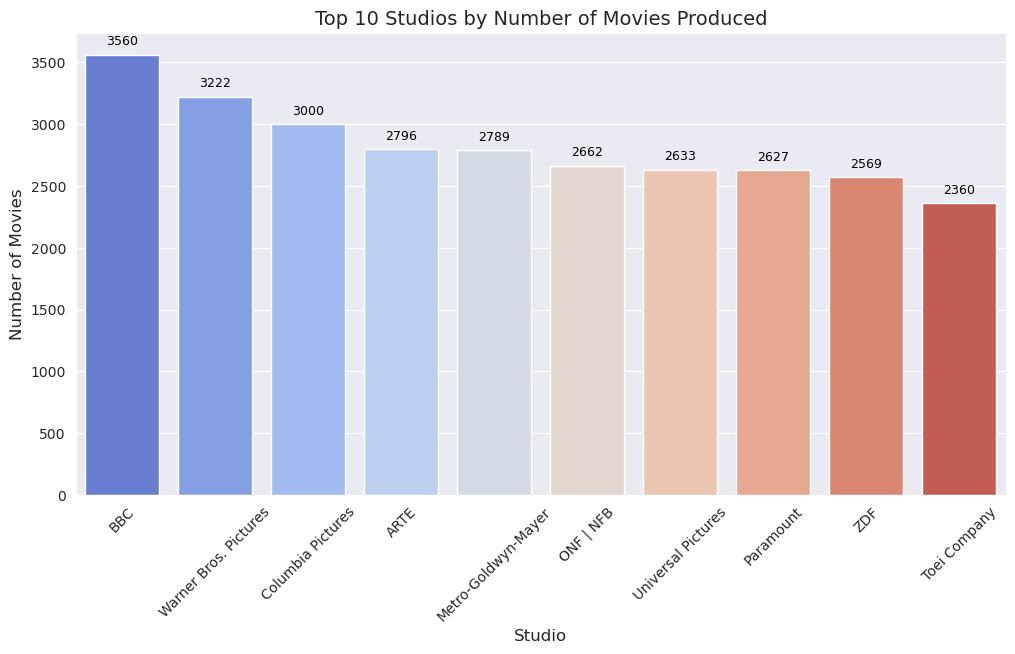

In [153]:
# Contare i film prodotti per ogni studio
studio_counts = df_studios_clean['studio'].value_counts().head(10)  # I primi 10 studi

# Creare un DataFrame temporaneo per il grafico
top_studios = studio_counts.reset_index()
top_studios.columns = ['studio', 'movie_count']

# Creare il barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='studio', y='movie_count', data=top_studios, palette='coolwarm')

# Aggiungere titolo e etichette
plt.title('Top 10 Studios by Number of Movies Produced', fontsize=14)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)

# Annotare i valori sopra le barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Possiamo chiederci come mai questi sono gli studios a produrre più film? Potrebbe essere magari una questione di longevità, la longevità potrebbe essere la chiave del loro successo. Per cui visualizziamo gli anni di inizio per ogni studio per verificarlo.

/tmp/ipykernel_4138/71099514.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




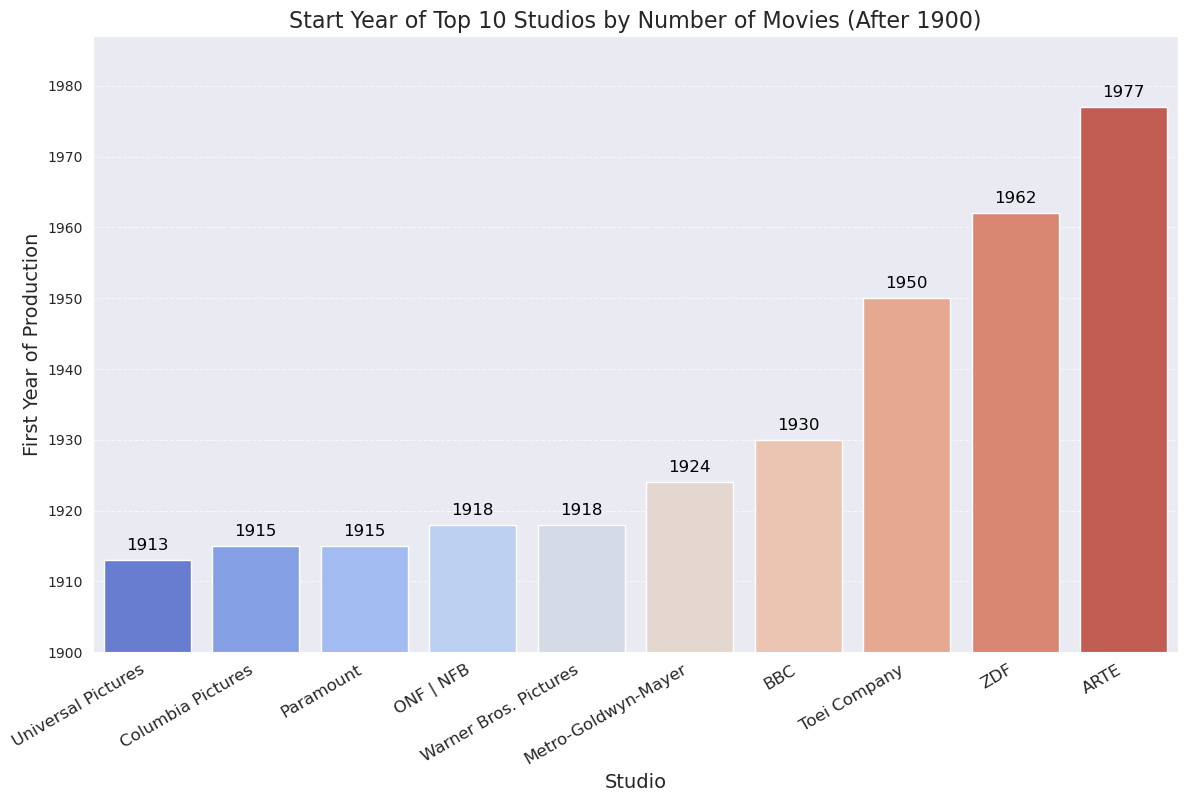

In [154]:
# Filtrare gli studios per escludere year = 0 e year <= 1900
studios_with_years = pd.merge(df_studios_clean, df_movies_clean[['id', 'year']], left_on='film_id', right_on='id')
studios_with_years = studios_with_years[(studios_with_years['year'] > 1900)]

# Calcolare l'anno di inizio per ogni studio
studio_start_years = studios_with_years.groupby('studio')['year'].min().sort_values().head(10)

# Calcolare i primi 10 studios per numero di film prodotti (dopo il 1900)
top_studios = studios_with_years['studio'].value_counts().head(10)

# Filtrare per i primi 10 studios
filtered_studios = studios_with_years[studios_with_years['studio'].isin(top_studios.index)]

# Calcolare l'anno di inizio per i primi 10 studios
studio_start_years_top = filtered_studios.groupby('studio')['year'].min().sort_values()

# Visualizzare il confronto con numeri sopra le barre
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=studio_start_years_top.index, y=studio_start_years_top.values, palette='coolwarm')

# Aggiungere i numeri sopra le barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Configurare titolo, etichette e asse y
plt.title('Start Year of Top 10 Studios by Number of Movies (After 1900)', fontsize=16)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('First Year of Production', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.ylim(1900, studio_start_years_top.max() + 10)  # L'asse y parte dal 1900
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Possiamo notare che i primi 3 per numero di film non sono necessariamente i più vecchi forse hanno solo adottato strategie diverse. Proviamo a vedere lungo gli anni quanti film hanno prodotto per ogni anno.

In [155]:
# Determinare i top 10 studios per numero di film prodotti
top_studios = studios_with_years['studio'].value_counts().head(10).index

# Filtrare i dati per i top studios
filtered_studios = studios_with_years[studios_with_years['studio'].isin(top_studios)]

# Calcolare il numero di film prodotti per studio e anno
studio_year_counts = filtered_studios.groupby(['studio', 'year']).size().reset_index(name='movie_count')

# Creare un grafico interattivo con Plotly
fig = px.line(
    studio_year_counts,
    x='year',
    y='movie_count',
    color='studio',
    title='Number of Movies Produced by Top 10 Studios Over Time',
    labels={'year': 'Year', 'movie_count': 'Number of Movies', 'studio': 'Studio'},
    markers=True,
)

# Personalizzare i layout del grafico
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=14,
    template='plotly_dark',  # Migliora visibilità con uno sfondo scuro
    legend=dict(
        title='Studio',
        font=dict(size=12),
        orientation='h',
        x=0.5,
        xanchor='center',
        y=-0.2
    )
)

# Mostrare il grafico
fig.show()

Si può notare che in alcuni casi la longevità è effettivamente un fattore che spiega il motivo per cui hanno prodotto più film, come ad esempio Paramount, che non ha dei particolari picchi negli anni. In altri casi come nel caso di ARTE che è meno vecchio rispetto ad altri studios ma ha avuto un notevole aumento nella produzione di film negli ultimi anni, cosa che l'ha portato ad essere al quarto posto tra gli studios che hanno prodotto più film.

### Ma quantità è sinonimo di qualità?

Andiamo a vedere quali sono gli studios con valutazioni più alte e se ci sono i nostri top_studios.

In [156]:
# Effettuare il merge includendo anche la colonna 'rating'
studios_with_years = pd.merge(
    df_studios_clean,
    df_movies_clean[['id', 'rating', 'year']],  # Assicurati di includere 'rating'
    left_on='film_id',
    right_on='id'
)


/tmp/ipykernel_4138/3164129328.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




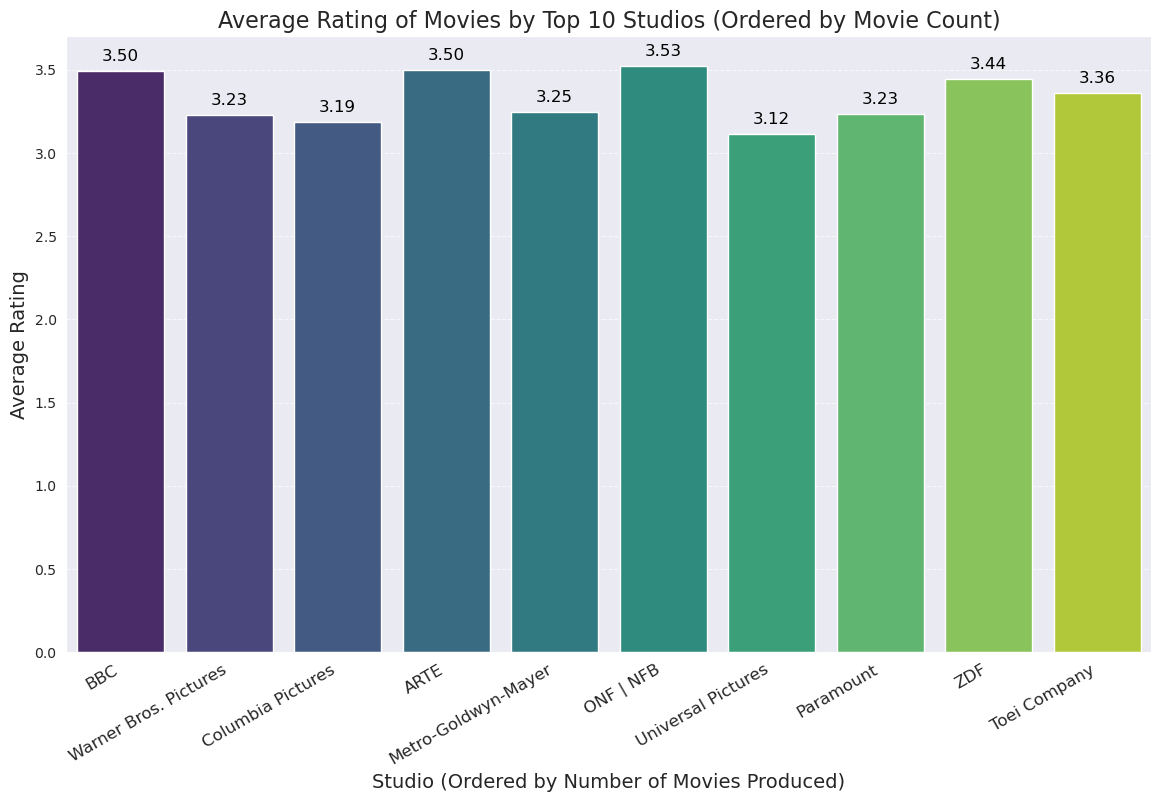

In [157]:
# Contare i film prodotti per ogni studio (calcolato una sola volta)
studio_counts = df_studios_clean['studio'].value_counts().head(10)  # I primi 10 studi

# Filtrare i dati per escludere valutazioni pari a -1
studios_with_valid_ratings = studios_with_years[studios_with_years['rating'] != -1]

# Filtrare i dati validi (rating != -1) per i top studios
filtered_valid_studios = studios_with_valid_ratings[studios_with_valid_ratings['studio'].isin(studio_counts.index)]

# Calcolare la valutazione media per i top studios
studio_avg_rating = (
    filtered_valid_studios.groupby('studio')['rating'].mean()
    .reindex(studio_counts.index)  # Garantire lo stesso ordine dei film prodotti
)

# Visualizzare il barplot ordinato per numero di film
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=studio_avg_rating.index, y=studio_avg_rating.values, palette='viridis')

# Annotare i valori sopra le barre
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Valore della valutazione media
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Aggiungere titolo, etichette e griglia
plt.title('Average Rating of Movies by Top 10 Studios (Ordered by Movie Count)', fontsize=16)
plt.xlabel('Studio (Ordered by Number of Movies Produced)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


La maggior parte di questi studios ha una valutazione media tra 3.1 e 3.5 , suggerendo che non ci sono grandi variazioni nella qualità media dei film. Ci sono alcuni studos come ONF | NFB e BBC che riescono a mantenere una valutazione alta nonostante la quantità, anzi BBC è addirittura lo studios che ha prodotto più film. Invece studidos come Universal Pictures e Columbia Pictures hanno una valutazione media più bassa, cosa che potebbe suggerire una maggiore diversificazione, con alcuni film di qualità più bassa.

Proviamo a vedere la distribuzione della valutazione per i diversi studios, per capire se effettivamente certi studios hanno maggiore diversificazione.

/tmp/ipykernel_4138/2565941996.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_4138/2565941996.py:6: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



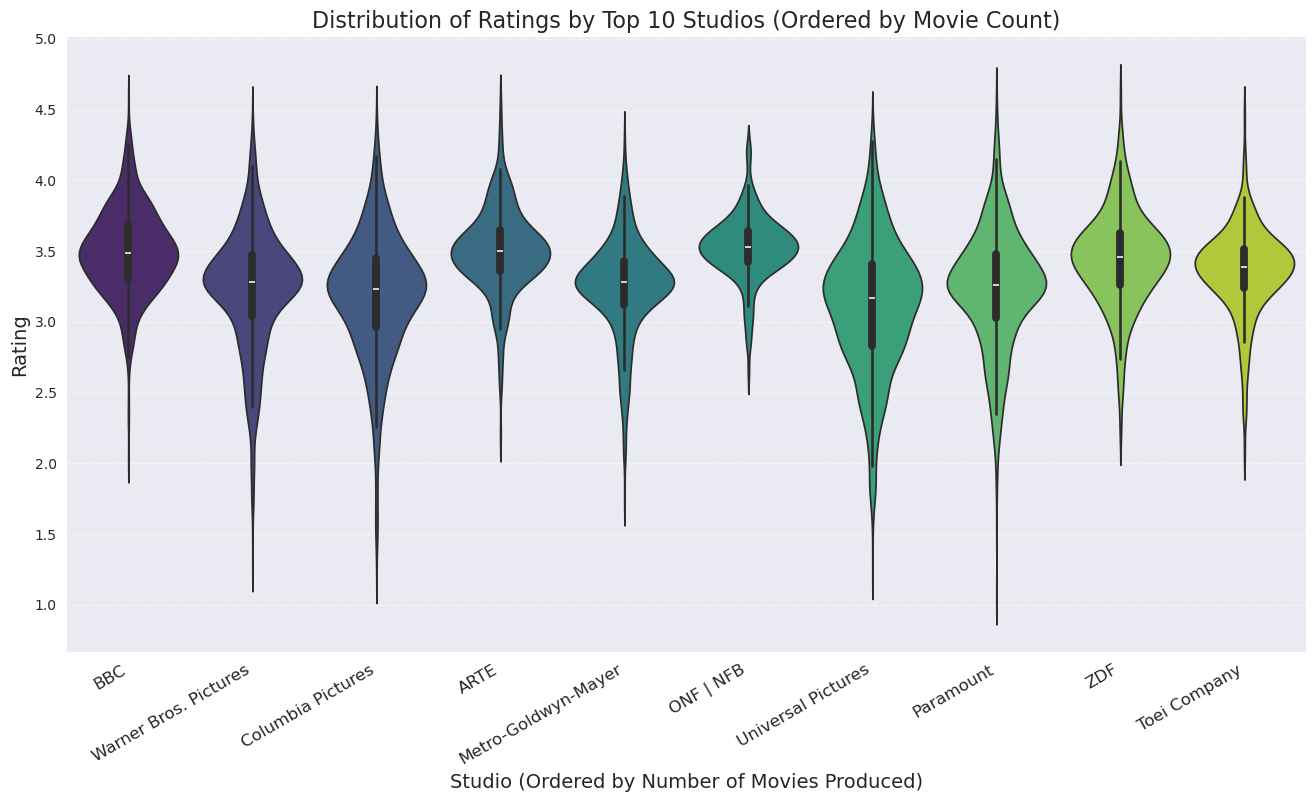

In [167]:
# Filtrare i dati validi (rating != -1) per i top studios
filtered_valid_studios = studios_with_valid_ratings[studios_with_valid_ratings['studio'].isin(studio_counts.index)]

# Creare il violinplot con l'ordine dei top studios
plt.figure(figsize=(16, 8))
sns.violinplot(x='studio', y='rating', data=filtered_valid_studios, palette='viridis', scale='width', order=studio_counts.index)

# Configurare titolo, etichette e griglia
plt.title('Distribution of Ratings by Top 10 Studios (Ordered by Movie Count)', fontsize=16)
plt.xlabel('Studio (Ordered by Number of Movies Produced)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Studios come Universal Pictures, Columbia Pictures, e Metro-Goldwyn-Mayer mostrano
distribuzioni più ampie, indicando che producono sia film molto apprezzati che film con
valutazioni basse.
Al contrario, studios come ONF/NFB e BBC hanno distribuzioni più strette, suggerendo una
qualità più uniforme nei loro film.
Inoltre alcuni studios (es. Paramount) hanno distribuzioni asimmetriche, con una coda più
lunga verso le valutazioni basse, suggerendo la presenza di film meno apprezzati.
Studios come ZDF e Toei Company hanno distribuzioni più centrate, indicando una produzione
stabile con meno outlier.

### Conclusioni preliminari:
### Quantità è sinonimo di qualità? Non necessariamente
Studios con un'alta produzione (es. Universal Pictures e Paramount) non sempre hanno valutazioni medie elevate. La quantità non sembra essere un indicatore diretto di qualità.
Studios come ONF/NFB e BBC sembrano puntare più sulla qualità che sulla quantità, come evidenziato dalle loro valutazioni medie elevate e distribuzioni strette.


Una domanda che sorge spontanea da questa analisi è se i generi prodotto dagli studios influenzano in qualche modo le valutazioni dei loro film e la loro distribuzione. Magari certi studios hanno diversificato di più la loro produzione, portando di conseguena ha una maggiore distribuzione delle valutazioni.

### Domanda: Il genere influisce sulla qualità? Maggiore diversificazione siginfica meno qualità?

Vediamo il numero di generi coperti dai top_studios

Direi che non ci aiuta dato che tutti hanno prodotto lo stesso numero di genrei
analizziamo se il genere cinematografico influisce sulla qualità calcolando la valutazione
media per ogni genere.

Calcoliamo la valutazione media per genere considerando solo i film prodotti dai top studios.

/tmp/ipykernel_4138/929264998.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




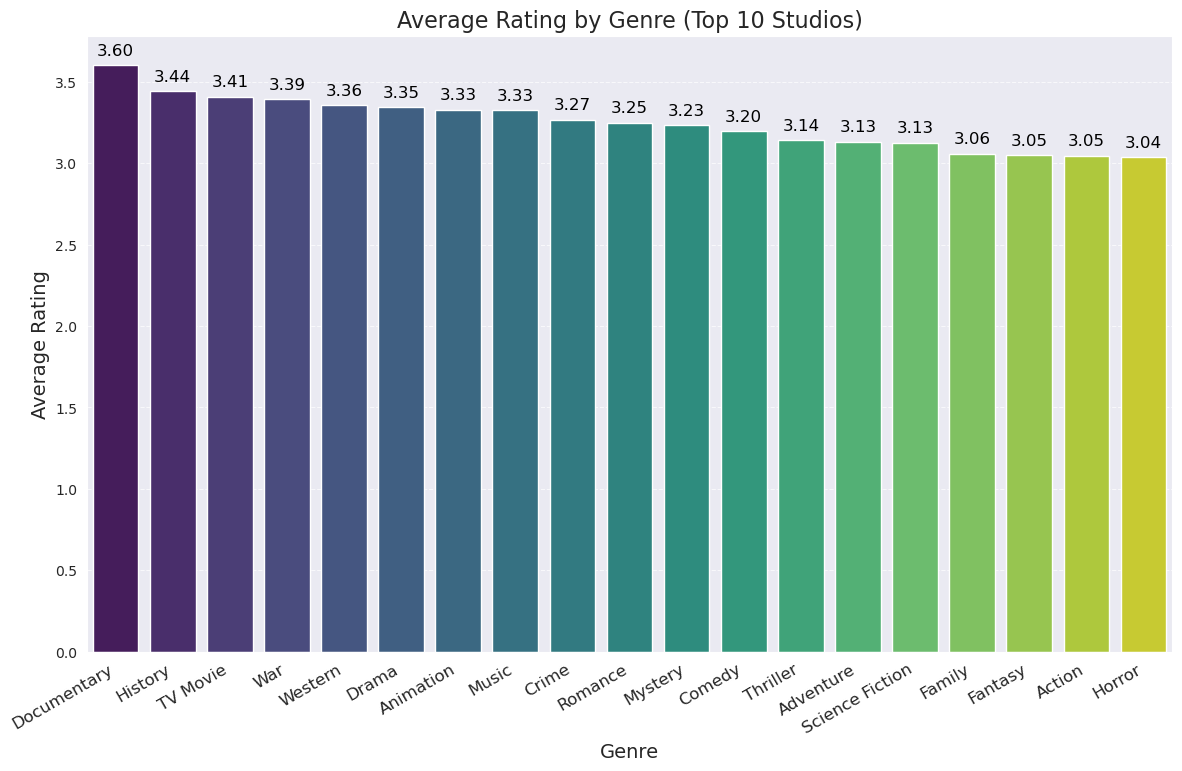

In [159]:
# Unire studios, generi e valutazioni
genres_with_ratings = pd.merge(df_movies_clean[['id', 'rating']], df_genres_clean, left_on='id', right_on='film_id')
genres_with_valid_ratings = genres_with_ratings[genres_with_ratings['rating'] != -1]

# Unire studios e generi
studios_with_genres = pd.merge(df_studios_clean, df_genres_clean, left_on='film_id', right_on='film_id')
# Filtrare i dati per i top studios
top_studios_list = studio_counts.index  # Lista dei top studios già calcolata
filtered_genres_top_studios = studios_with_genres[studios_with_genres['studio'].isin(top_studios_list)]

# Filtrare i dati per i top studios
filtered_genres_with_ratings = genres_with_valid_ratings[genres_with_valid_ratings['film_id'].isin(filtered_genres_top_studios['film_id'])]

# Calcolare la valutazione media per genere
top_studios_genre_avg_rating = filtered_genres_with_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)

# Visualizzare il barplot delle valutazioni medie per genere
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=top_studios_genre_avg_rating.index, y=top_studios_genre_avg_rating.values, palette='viridis')

# Annotare i valori sopra le barre
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Aggiungere titolo e etichette
plt.title('Average Rating by Genre (Top 10 Studios)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Da questo grafico possiamo capire che generi come i documentari o film storici sembrano essere mediamente più apprezzati, mentre i film horror sembrano non essere mediamente molto apprezzati.

Per rispondere alla seconda parte della domanda, calcoliamo la valutazione media e la diversificazione dei generi per ciascuno dei top_studios e visualizziamo i dati in uno scatterplot.

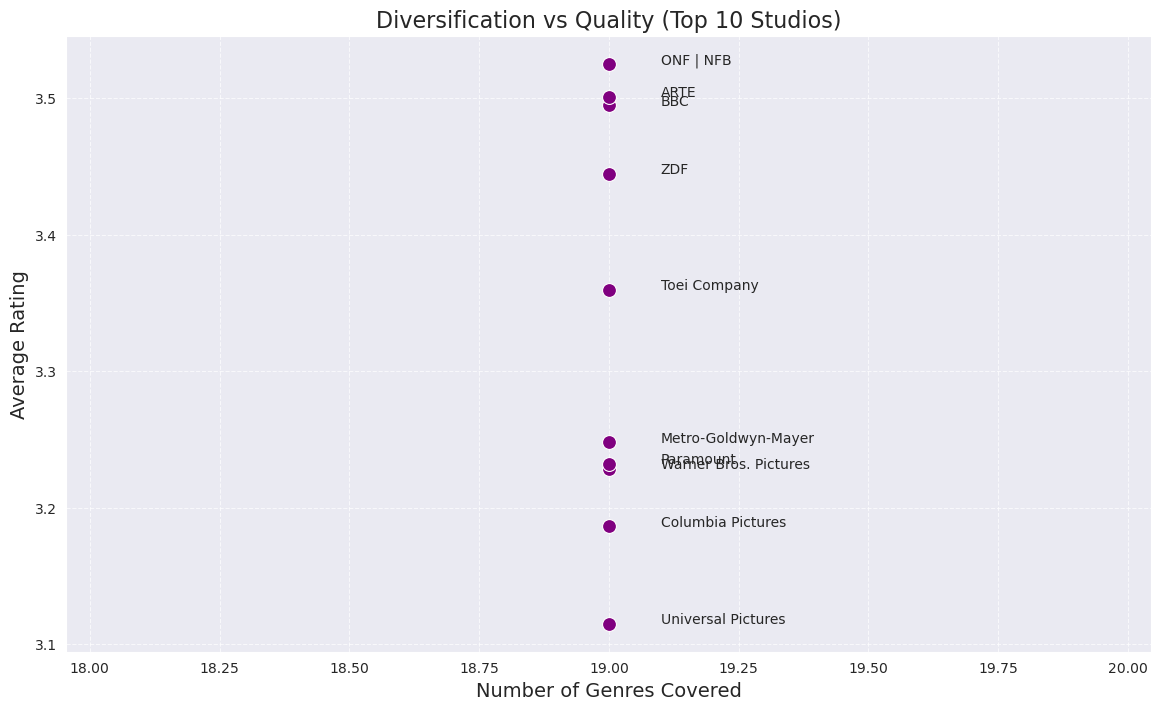

In [160]:
# Calcolare la diversificazione e la valutazione media per i top studios
top_studios_genre_quality = filtered_genres_top_studios.merge(
    filtered_valid_studios.groupby('studio')['rating'].mean(),
    on='studio'
).groupby('studio').agg({'genre': 'nunique', 'rating': 'mean'}).reindex(top_studios_list)
top_studios_genre_quality.columns = ['genre_count', 'avg_rating']

# Visualizzare lo scatterplot (diversificazione vs qualità)
plt.figure(figsize=(14, 8))
sns.scatterplot(x='genre_count', y='avg_rating', data=top_studios_genre_quality, s=100, color='purple')

# Annotare i punti con il nome dello studio
for i, row in top_studios_genre_quality.iterrows():
    plt.text(row['genre_count'] + 0.1, row['avg_rating'], i, fontsize=10)

# Aggiungere titolo e etichette
plt.title('Diversification vs Quality (Top 10 Studios)', fontsize=16)
plt.xlabel('Number of Genres Covered', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

Dal grafico di sopra possiamo vedere che in realtà tutti gli studios producono tutti lo stesso numero di generi, ciò nonostante alcuni riescono a mantenere una qualità maggiore

Contiamo i generi predominanti per ogni studio.

In [162]:
# Contare i film per studio e genere
studio_genre_counts = filtered_genres_top_studios.groupby(['studio', 'genre']).size().reset_index(name='count')

# Creare un grafico interattivo a barre impilate
fig = px.bar(
    studio_genre_counts,
    x='studio',
    y='count',
    color='genre',
    title='Genre Contribution to Top 10 Studios',
    labels={'count': 'Number of Movies', 'studio': 'Studio', 'genre': 'Genre'},
    text_auto=True,
)

# Personalizzare il layout del grafico
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=14,
    template='plotly_dark',  # Sfondo scuro
    barmode='stack',  # Barre impilate
    xaxis=dict(tickangle=-45),  # Ruotare le etichette sull'asse X
    legend=dict(
        title='Genre',
        font=dict(size=12),
        orientation='v',
        x=1.02,
        xanchor='left',
        y=1
    )
)

# Mostrare il grafico interattivo
fig.show()

da questo grafico possiamo notare (soprattuto se si sfrutta l'interattività per isolare i singoli generi) quali generi predominino nei singoli studios e la loro distribuzione. Ad esempio ZDF sembra essere abbastanza bilanciato nella scelta del genere, mentre invece studidos come ARTE o BBC hanno una grande prevalenza di documentari, ad esempio.

Distribuzione delle valutazioni per genere nei top studios

/tmp/ipykernel_4138/2277909217.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_4138/2277909217.py:3: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



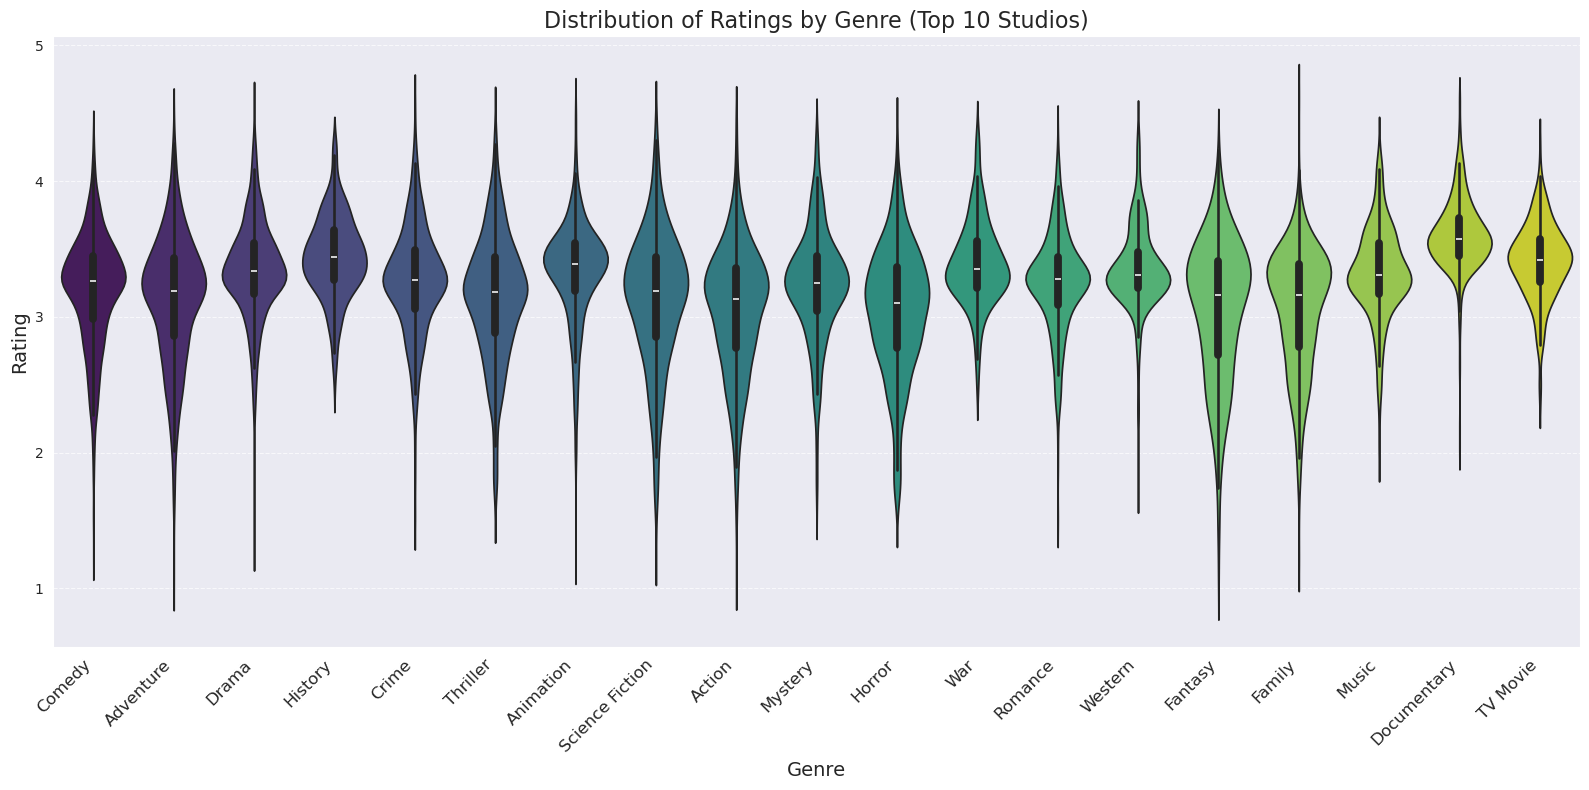

In [164]:
# Creare un violinplot per i generi nei top studios
plt.figure(figsize=(16, 8))
sns.violinplot(x='genre', y='rating', data=filtered_genres_with_ratings, palette='viridis', scale='width')

plt.title('Distribution of Ratings by Genre (Top 10 Studios)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Quali generi hanno le valutazioni più alte nei top studios?

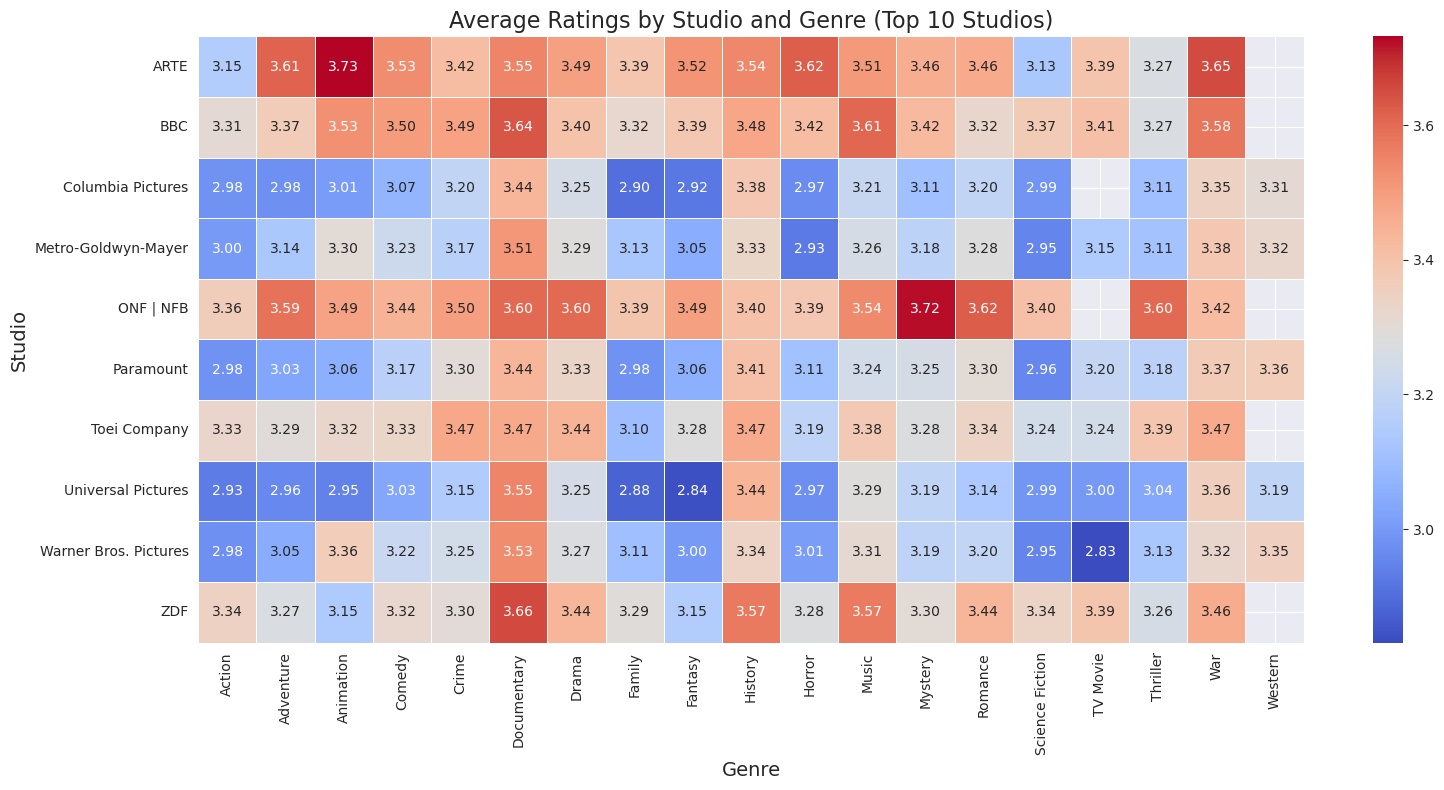

In [165]:
# Unire per aggiungere la colonna 'studio' a filtered_genres_with_ratings
filtered_genres_with_ratings = pd.merge(
    filtered_genres_with_ratings,
    filtered_genres_top_studios[['film_id', 'studio']],
    on='film_id',
    how='inner'
)

# Calcolare la valutazione media per studio e genere
studio_genre_ratings = filtered_genres_with_ratings.groupby(['studio', 'genre'])['rating'].mean().reset_index()

# Creare una matrice pivot per la heatmap
pivot_ratings = studio_genre_ratings.pivot(index='studio', columns='genre', values='rating')

# Visualizzare la heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_ratings, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

plt.title('Average Ratings by Studio and Genre (Top 10 Studios)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Studio', fontsize=14)
plt.tight_layout()
plt.show()


Da questa heatmap possiamo vedere quali sono i generi che per ogni studios hanno ottenuto valutazioni più alte. Ad esempio possiamo notare che le valutazioni più alte ce le hanno ARTE per l'animation e ONF|NFB per il genere Mystery. Ma per avere un'idea più chiara bisogna considerare anche il numero di film, per esempio abbiamo già visto che BBC ha si è specializzata soprattutto in documentari, e un gran numero di documentari con una buona valutazione suggeriscono una particolare specializzazione in quell'ambito. Ma ad esempio uno studios potrebbe aver fatto 2 film per un determinato genere con una valutazione alta, ma ciò non vuol dire che sono specializzati in quell'ambito.

In [166]:
# Unire i dati per calcolare numero di film e valutazione media per studio e genere
studio_genre_stats = filtered_genres_with_ratings.groupby(['studio', 'genre']).agg(
    movie_count=('film_id', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()

# Creare un grafico interattivo con Plotly
fig = px.scatter(
    studio_genre_stats,
    x='movie_count',
    y='avg_rating',
    size='movie_count',
    color='studio',
    hover_name='genre',
    title='Correlation Between Number of Movies, Genre, and Average Ratings',
    labels={
        'movie_count': 'Number of Movies',
        'avg_rating': 'Average Rating',
        'studio': 'Studio'
    },
    size_max=30
)

# Personalizzare il layout
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=14,
    template='plotly_dark'
)

# Mostrare il grafico interattivo
fig.show()

Da questo grafico possiamo sia confermare alcune delle supposizioni che abbiamo fatto prima: ci sono certi studios come BBC e ARTE che eccellono in generi specifici (documentary, history,...), mentre altri studios più commerciali come Warner Bros e Universal Pictures, coprono una gamma più ampia di generi, spesso con valutazioni medie inferiori.
Possiamo notare l'importanza di aver considerato il numero di film poiché ad esempio avevamo notato prima che ONF|NFB aveva una valutazione alta per mystery, ma ha fatto solamente 3 film per quel genere. Ciò nonostante è interessante notare come pur avendo fatto molti meno film rispetto a studios come Warner Bros ad esempio, ONF|NFB sembrano puntare molto sul genere dell'animation, avendo un'ottima qualità.

### Conclusioni preliminari
### Il genere influisce sulla qualità? Sì
Dai grafici emerge:
- Generi come Documentary, History e TV Movie tendono ad avere valutazioni medie più alte, suggerendo che questi generi attraggono produzioni più curate o un pubblico più selettivo.
- Generi popolari come Action e Comedy mostrano una maggiore variabilità nella qualità, probabilmente perché vengono prodotti un grandi volumi, a scapito della coerenza qualitativa.
- La qualità non è uniforme all'interno di un genere: studi specifici eccellono in determinati generi (es. BBC in History o ONF|NFB in Documentary).

Per cui possiamo concludere che la qualità media è influenzata dal genere, e i generi di nicchia o meno commerciali tendono a essere associati a valutazioni più alte.

### Maggiore diversificazione significa meno qualità? In generale sì.
Dai grafici emerge:
- Studios molto diversificati, come Universal Pictures e Warner Bros, producono molti film in una vasta gamma di generi, ma con valutazioni medie intorno a 3.1-3.2.
- Al contrario, studi specializzati come ONF|NFB e BBC, che si concentrano su meno generi, mostrano valutazioni medie più alte, spesso sopra il 3.4.

Per cui possiamo concludere che gli studi che si concentrano su pochi generi tendono ad ottenre una qualità superiore, mentre quelli più diversificati sacrificano la qualità per un'ampia offerta.

## Domanda: Il paese di produzione influisce sul successo dei top studio? Che strategia adottano?

Potremmo chiederci, a questo punto, se il paese di produzione influisce sul successo degli studios. Esistono determinati paesi che contribuiscono maggiormente al loro successo? Inoltre, quale strategia adottano i top studios: si concentrano su pochi paesi chiave o diversificano la produzione su scala globale? E come queste scelte influenzano la loro qualità e quantità di film prodotti?

### Prova GeoPandas

In [169]:
import os
from folium.plugins import MarkerCluster

In [170]:
# Assicurati che PROJ_LIB sia configurato correttamente
os.environ['PROJ_LIB'] = '/home/bigbigdario/miniconda3/share/proj'

# Path ai dati geografici scaricati manualmente
data_directory = "data/ne_110m_admin_0_countries/"
countries_gdf = gpd.read_file(data_directory + "ne_110m_admin_0_countries.shp")

# Sostituire eventuali nomi non standard (ad esempio, US -> United States of America)
countries_gdf['ADMIN'] = countries_gdf['ADMIN'].replace('US', 'United States of America')

# Controllare e pulire i dati geografici
if countries_gdf.crs is None:
    countries_gdf = countries_gdf.set_crs("EPSG:4326")  # Imposta WGS84 se il CRS è assente
countries_gdf = countries_gdf[countries_gdf.is_valid & ~countries_gdf.is_empty]  # Rimuove geometrie non valide

# Passo 1: Filtrare solo i top studios
top_studios_list = studio_counts.index  # Lista dei top studios già calcolata
top_studios_data = studios_with_years[studios_with_years['studio'].isin(top_studios_list)]

# Passo 2: Unire i top studios con il dataset dei paesi
top_studios_geo = pd.merge(
    top_studios_data,  # Film prodotti dai top studios
    df_countries_clean,  # Paesi di produzione
    on='film_id',
    how='inner'
)

# Passo 3: Calcolare il numero di film per paese e studio
top_studios_country_stats = top_studios_geo.groupby(['country', 'studio']).agg(
    num_movies=('film_id', 'count')
).reset_index()

# Passo 4: Unire con il dataset geografico per la visualizzazione
world_top_studios = countries_gdf.merge(
    top_studios_country_stats.groupby('country').agg(
        total_movies=('num_movies', 'sum')  # Film totali per paese
    ).reset_index(),
    left_on='ADMIN',
    right_on='country',
    how='left'
)
world_top_studios['total_movies'] = world_top_studios['total_movies'].fillna(0)

# **Mappa Interattiva con Folium (Dominanza per Paese)**
world_top_studios = world_top_studios.to_crs("EPSG:4326")  # CRS compatibile con lat/lon
m = folium.Map(location=[20, 0], zoom_start=2)

# Layer coropletico per i film prodotti
folium.Choropleth(
    geo_data=world_top_studios.__geo_interface__,
    data=world_top_studios,
    columns=['ADMIN', 'total_movies'],
    key_on='feature.properties.ADMIN',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Movies Produced by Top Studios"
).add_to(m)

# Cluster per mostrare i dettagli dei paesi con produzione elevata
marker_cluster = MarkerCluster().add_to(m)
for _, row in world_top_studios.iterrows():
    if row['total_movies'] > 0:
        folium.Marker(
            location=[row.geometry.centroid.y, row.geometry.centroid.x],
            popup=f"{row['ADMIN']}: {int(row['total_movies'])} movies"
        ).add_to(marker_cluster)

# Salvare e mostrare la mappa
m.save("top_studios_movies_by_country_map_clustered.html")
m

Dalla mappa soprastante possiamo notare che gli Stati Uniti dominano chiaramente la produzione. In Europa i maggiori paesi sono in Regno Unito e Germania, ma si può notare una certa diversificazione dei Paesi, con numerosi partecipanti ma in quantità minore rispetto agli Stati Uniti. In Oriente il Giappone è nettamente il maggiore produttore.

In [179]:
import plotly.express as px

# Generazione della treemap con hovertemplate personalizzato
fig = px.treemap(
    top_studios_country_stats,
    path=['country', 'studio'],
    values='num_movies',
    color='num_movies',
    color_continuous_scale='YlOrRd',
    title="Top Studios and Movies Produced by Country"
)

# Personalizzare l'hovertemplate per mostrare solo num_movies_sum
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>'
                  'Movies Produced: %{value}<br>'
                  '%{parent}<extra></extra>'
)

# Mostrare la treemap
fig.show()

Nella treemap qui sopra possiamo osservare visivamente la distribuzione della produzione cinematografica, suddivisa per Paese e studio. Negli Stati Uniti Warner Bros, Metro-Goldwyn-Mayer e Columbia Pictures si distinguono per la loro elevata produzione. In paesi come il Canada o la Germania, la produzione è maggiormente concentrata su studi locali come ONF|NFB e ZDF, rispettivamente.

In [185]:
# Creare una treemap per la diversificazione geografica con colorazione per paese
fig_treemap = px.treemap(
    top_studios_country_stats,  # Dati con 'num_movies'
    path=['studio', 'country'],  # Struttura: Studio > Paese
    values='num_movies',  # Numero totale di film prodotti
    color='country',  # Colore in base al paese
    title='Geographic Distribution of Movies by Top Studios'
)

# Personalizzare l'hovertemplate per mostrare solo i dati desiderati
fig_treemap.update_traces(
    hovertemplate='<b>%{label}</b><br>'
                  'Movies Produced: %{value}<br>'
                  '%{parent}<extra></extra>'
)

# Personalizzare il layout
fig_treemap.update_layout(
    title_font_size=20,
    template='plotly_dark',
    coloraxis_colorbar=dict(
        title="Countries",
        tickvals=[],  # Rimuovere eventuali etichette indesiderate sulla barra colori
        ticks="outside"
    )
)

# Mostrare la treemap
fig_treemap.show()

Invece da quest'altra treemap rappresenta la distribuzione geografica dei film prodotti dai top studios. Possiamo notare come per studios
come Warner Bros, Metro-Goldwynn-Mayer e Columbia Pictures la loro produzione si concentra prevalentemente all'interno degli Stati Uniti
d'America. In Europa invece studios come BBC (Regno Unito), ZDF (Germania) e ARTE (Germania/Francia) mostrano una diversificazione
significativa. Altri studios come Toei Company (Giappone) e ONF|NFB dominano nei rispettivi paesi.

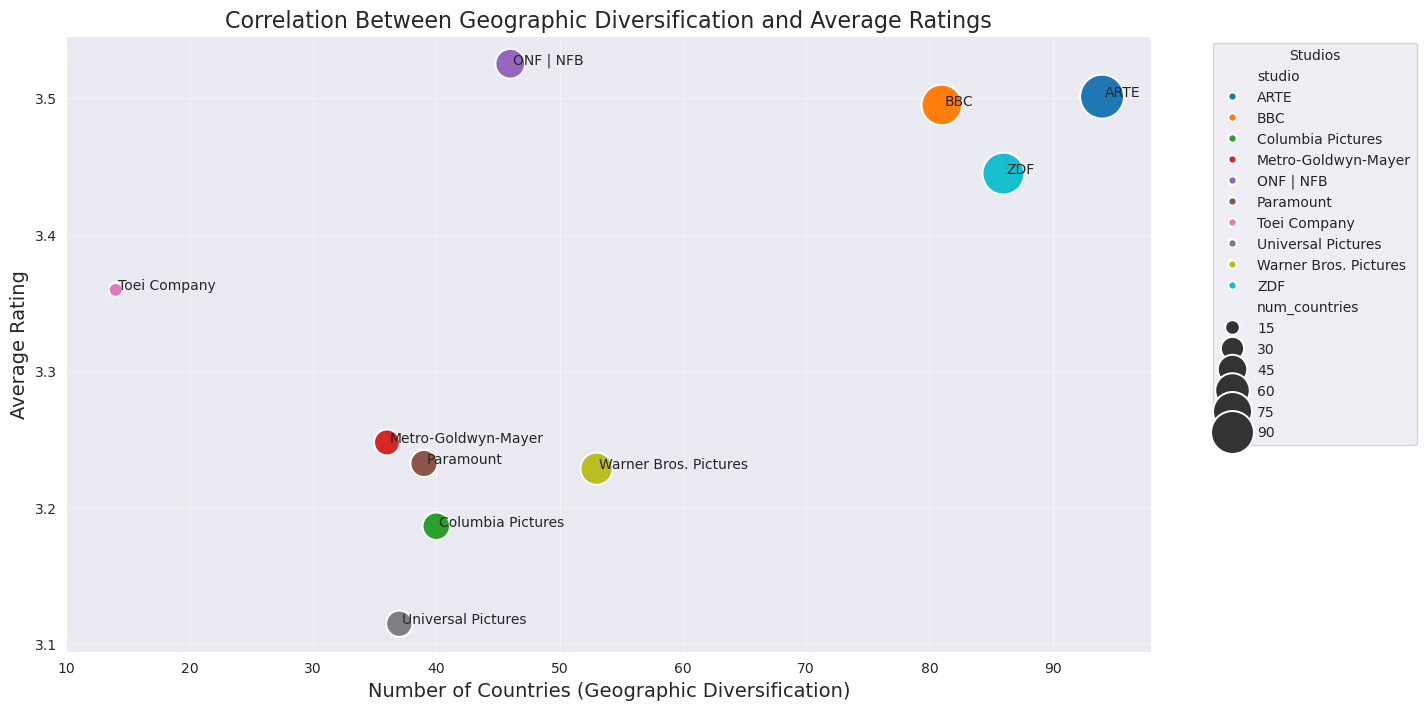

In [186]:
# Step 1: Misurare la diversificazione geografica
geo_diversification = top_studios_country_stats.groupby('studio')['country'].nunique().reset_index()
geo_diversification.columns = ['studio', 'num_countries']

# Step 2: Calcolare la qualità media
studio_avg_rating = (
    studios_with_valid_ratings.groupby('studio')['rating'].mean().reset_index()
)
studio_avg_rating.columns = ['studio', 'avg_rating']

# Step 3: Unire le metriche
studio_analysis = pd.merge(geo_diversification, studio_avg_rating, on='studio')

# Step 4: Visualizzare la correlazione
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='num_countries',
    y='avg_rating',
    size=studio_analysis['num_countries'],  # Dimensione basata sul numero di paesi
    sizes=(100, 1000),
    hue=studio_analysis['studio'],  # Colore in base agli studios
    data=studio_analysis
)

# Annotare i punti con i nomi degli studios
for i, row in studio_analysis.iterrows():
    plt.text(
        row['num_countries'] + 0.2,
        row['avg_rating'],
        row['studio'],
        fontsize=10
    )

# Titolo e etichette
plt.title('Correlation Between Geographic Diversification and Average Ratings', fontsize=16)
plt.xlabel('Number of Countries (Geographic Diversification)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(title='Studios', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


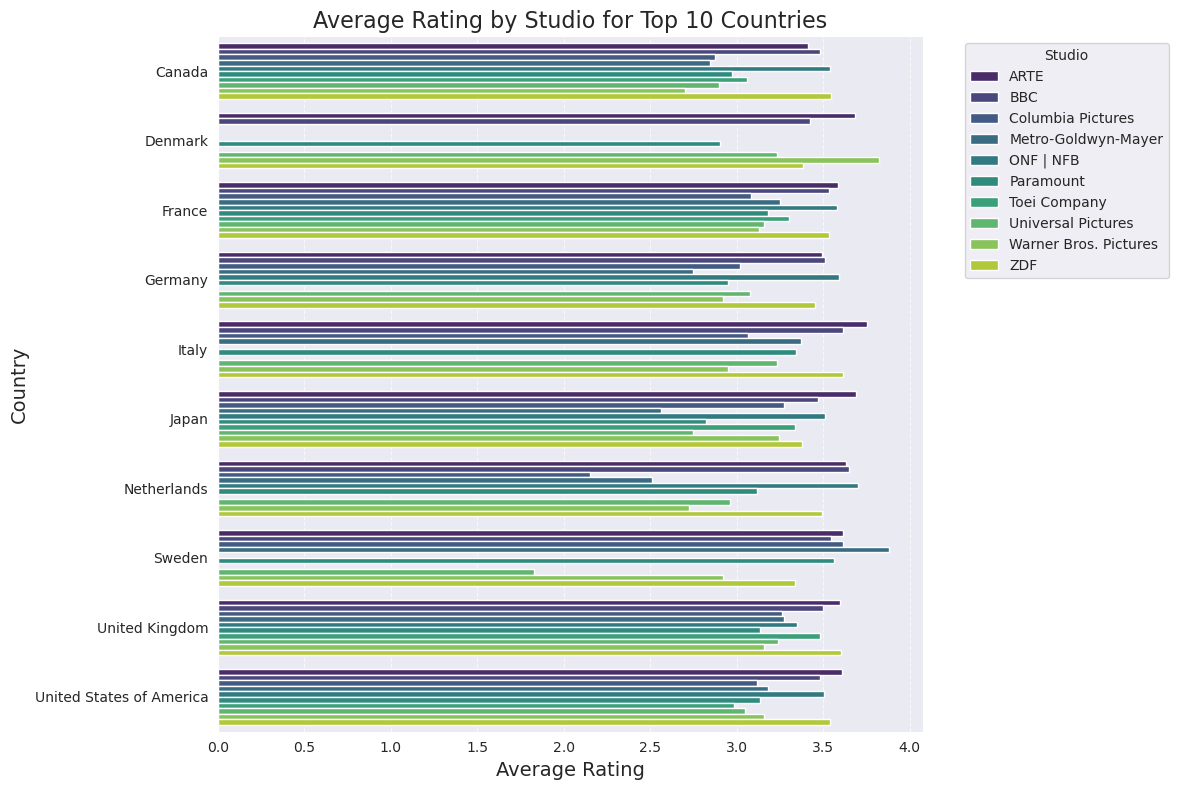

In [205]:
# Unire studios, valutazioni e paesi
studio_country_ratings = pd.merge(
    top_studios_geo,  # Dati su studios e paesi
    studios_with_valid_ratings[['film_id', 'rating']],  # Film con valutazioni valide
    on='film_id',  # Collegare tramite l'id dei film
    how='inner'
)

# Filtrare i Paesi con almeno 10 film prodotti per studio
filtered_country_ratings = studio_country_ratings.groupby(['country', 'studio']).agg(
    num_movies=('film_id', 'count'),
    avg_rating=('rating_x', 'mean')
).reset_index()

# Filtrare i Paesi principali (ad esempio, i primi 10 con il maggior numero di film prodotti)
top_countries = (
    filtered_country_ratings.groupby('country')['num_movies'].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtrare i dati solo per i Paesi principali
top_country_ratings = filtered_country_ratings[filtered_country_ratings['country'].isin(top_countries)]

# Creare un barplot orizzontale
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_country_ratings,
    x='avg_rating',
    y='country',
    hue='studio',
    palette='viridis'
)

# Configurare il grafico
plt.title('Average Rating by Studio for Top 10 Countries', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.legend(title='Studio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dal grafico possiamo notare che studi come BBC, ARTE e ZDF, che operano prevalentemente in Europa, tendono a concentrarsi su particolari Paesi
(Francia e Germania ad esempio), invece studios come Warner Bros e Universal Pictures, più commerciali e globali, mostrano una presenza in
quasi tutti i paesi rappresentati.
Possiamo notare che gli studi con una forte base in Canada (ad esempio ONF|NFB) e in Francia (come ARTE) mostrano valutazioni medie costantemente alte, riflettendo la scelta di trattare documentari o produzioni più culturali curate per un pubblico più selettivo.
La Toei Company, principale studio giapponese, sembra mantenere una buona qualità, confermata dalle valutazioni alte nel suo Paese.
Gli studi statunitensi, come Warner Bros e Universal, pur essendo i più diversificati, non eccellono in qualità, con valutazioni medie spesso inferiori rispetto a studios focalizzati.

## Conclusioni preliminari

## Il paese di produzione influisce sul successo dei top studios? Sì, sia in termini di quantità che di qualità.
- Gli Stati Uniti dominano la produzione cinematografica globale in termini di quantità, grazie a studios come Warner Bros, Universal Pictures e Columbia Pictures. Tuttavia, la qualità media dei film prodotti negli Stati Uniti tende a essere inferiore rispetto a quella di paesi come Regno Unito, Germania, Francia o Giappone.
- In Europa e in Giappone, studios come BBC, ZDF, ARTE e Toei Company producono meno film, ma si distinguono per una qualità media più alta, spesso specializzandosi in generi specifici (es. documentari, animazione).

Possiamo per cui concludere che la qualità sembra quindi essere più alta nei paesi con una produzione meno diversificata e più focalizzata, rispetto agli Stati Uniti, dove il mercato globale porta a una maggiore quantità ma a una qualità meno uniforme.


## Che strategia adottano i top studios?  I top studios adottano strategie diverse in base al loro contesto geografico e obiettivi di mercato.
- Studios americani: Hanno una strategia di diversificazione geografica e di generi, producendo film in numerosi paesi e per un mercato globale. Questa strategia probabilmente permette loro di massimizzare i profitti, ma spesso a scapito della qualità media.
- Studios europei e canadesi (BBC, ZDF, ARTE, ONF|NFB): Si concentrano su meno paesi e su generi specifici, come documentari e film storici. Questa specializzazione consente loro di mantenere una qualità media più alta.
- Studios giapponesi (Toei Company): Mostrano una produzione altamente focalizzata, prevalentemente nel mercato locale e in generi come l'animazione, che sono apprezzati a livello globale.

Possiamo concludere dicendo che a seconda del Paese gli studios sembrano avere strategie diverse, puntando sulla quantità nel caso di mercati globali come gli Stati Uniti, sulla qualità in produzioni europee, giapponesi e canadesi.

## Domanda: Qual è la relazione tra i premi Oscar e il successo degli studios?

In [207]:
oscar_data = pd.merge(
    df_oscar_clean,  # Dataset sugli Oscar
    df_movies_clean[['name', 'id', 'rating']],  # Dataset sui film con valutazioni
    left_on='film',
    right_on='name',
    how='inner'
)

In [209]:
# Aggiungere lo studio ai dati sugli Oscar
oscar_data_with_studios = pd.merge(
    oscar_data,  # Dati sugli Oscar e film
    df_studios_clean[['film_id', 'studio']],  # Dati sugli studios
    left_on='id',  # Collega l'id del film
    right_on='film_id',
    how='inner'
)

In [210]:
oscar_wins_by_studio = oscar_data_with_studios[oscar_data_with_studios['winner'] == True].groupby('studio').agg(
    num_oscar_wins=('film', 'count'),  # Numero di Oscar vinti dallo studio
    avg_rating=('rating', 'mean')     # Media delle valutazioni dei film che hanno vinto Oscar
).reset_index()

In [211]:
# Calcolare il numero totale di film prodotti da ogni studio
studio_movie_counts = df_studios_clean.groupby('studio').size().reset_index(name='total_movies')

# Unire i dati con il numero totale di film
oscar_analysis = pd.merge(
    oscar_wins_by_studio,
    studio_movie_counts,
    on='studio',
    how='left'
)

# Aggiungere la proporzione di film che hanno vinto Oscar
oscar_analysis['oscar_win_rate'] = oscar_analysis['num_oscar_wins'] / oscar_analysis['total_movies']

Relazione tra qualità media e numero di oscar vinti

In [223]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'DejaVu Sans'  # Cambia il font
mpl.rcParams['axes.unicode_minus'] = False  # Supporta i segni meno


In [224]:
# Filtra solo i top 10 studios per numero di Oscar vinti
oscar_analysis_top = oscar_analysis.nlargest(10, 'num_oscar_wins')

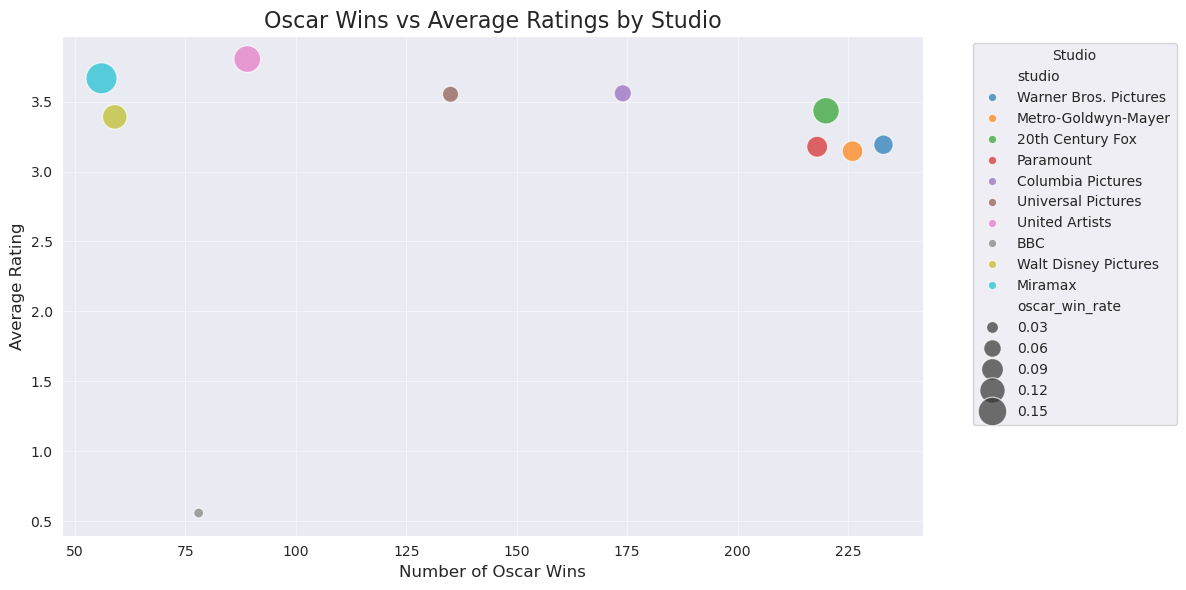

In [225]:
plt.figure(figsize=(12, 6))

# Usa i dati filtrati
sns.scatterplot(
    data=oscar_analysis_top,  # Usa solo i top 10 studios
    x='num_oscar_wins',
    y='avg_rating',
    size='oscar_win_rate',
    hue='studio',
    sizes=(50, 500),
    alpha=0.7
)

plt.title('Oscar Wins vs Average Ratings by Studio', fontsize=16)
plt.xlabel('Number of Oscar Wins', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Studio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()  # Evita sovrapposizioni
plt.show()

/tmp/ipykernel_4138/915434803.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




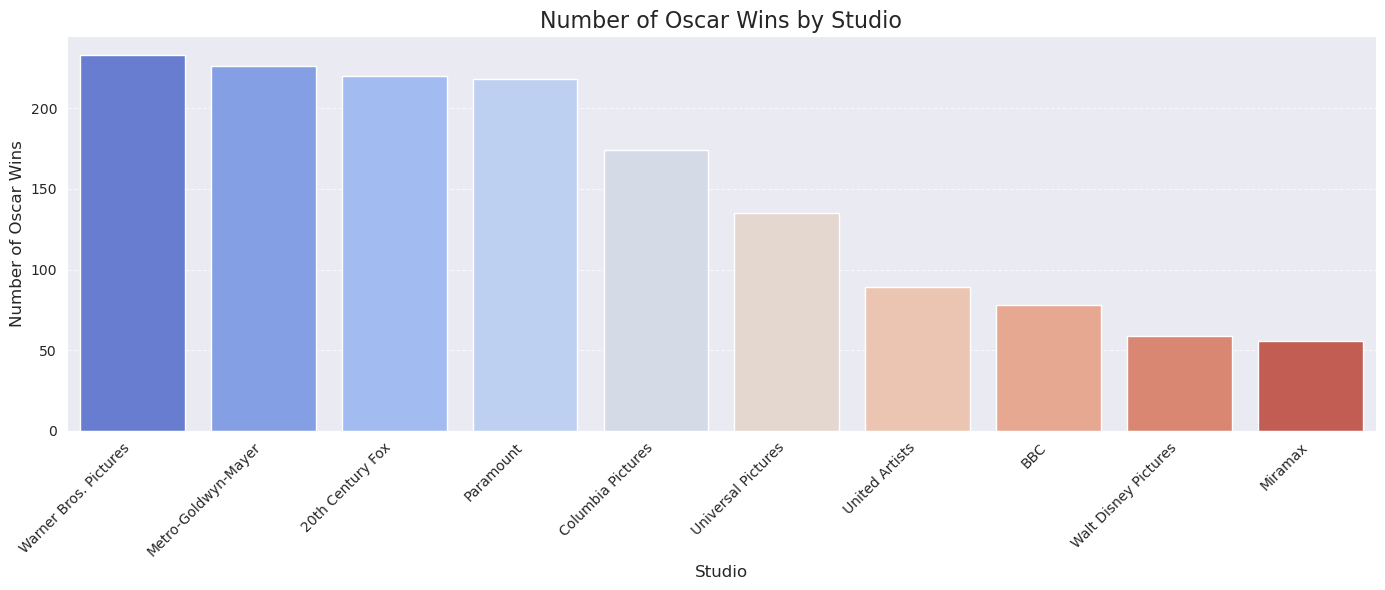

In [226]:
plt.figure(figsize=(14, 6))

sns.barplot(
    data=oscar_analysis_top,  # Filtra i top studios
    x='studio',
    y='num_oscar_wins',
    palette='coolwarm'
)

plt.title('Number of Oscar Wins by Studio', fontsize=16)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Number of Oscar Wins', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Evita sovrapposizioni
plt.show()

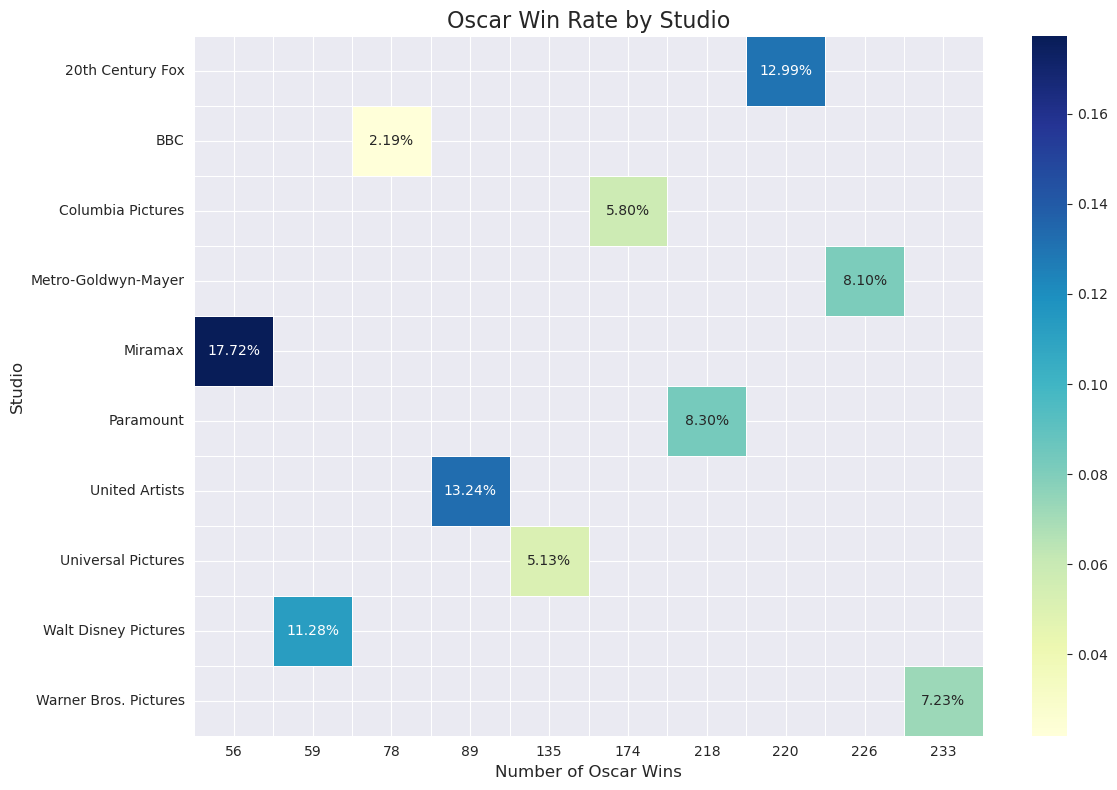

In [227]:
# Usa una pivot table per i top studios
oscar_analysis_heatmap = oscar_analysis_top.pivot(
    index='studio', columns='num_oscar_wins', values='oscar_win_rate'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    oscar_analysis_heatmap,
    cmap='YlGnBu',
    annot=True,
    fmt='.2%',
    linewidths=0.5
)

plt.title('Oscar Win Rate by Studio', fontsize=16)
plt.xlabel('Number of Oscar Wins', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.tight_layout()  # Evita sovrapposizioni
plt.show()


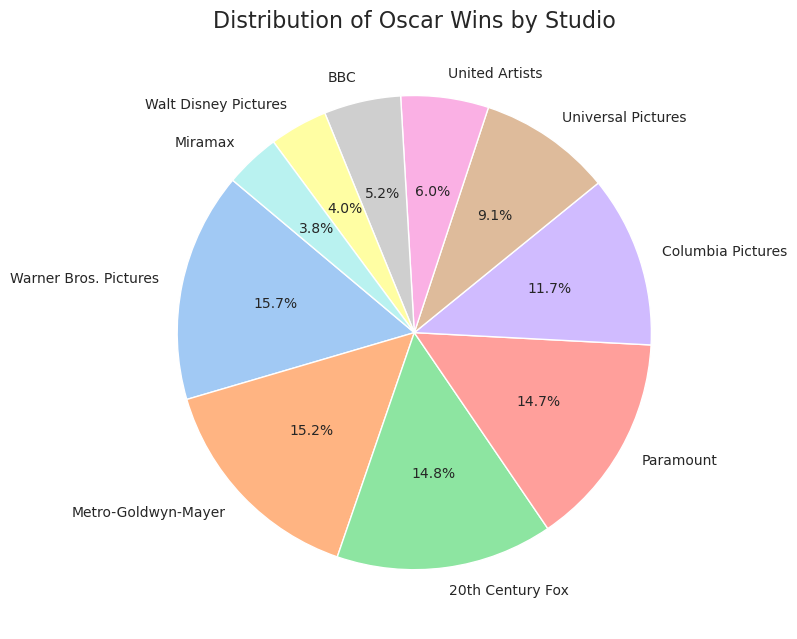

In [228]:
plt.figure(figsize=(8, 8))

plt.pie(
    oscar_analysis_top['num_oscar_wins'],  # Usa i top studios
    labels=oscar_analysis_top['studio'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)

plt.title('Distribution of Oscar Wins by Studio', fontsize=16)
plt.tight_layout()  # Evita sovrapposizioni
plt.show()

usando top studios

In [233]:
# Filtrare i dati per i top studios
top_studios_oscar_analysis = oscar_analysis[oscar_analysis['studio'].isin(top_studios)]


/tmp/ipykernel_4138/684428810.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




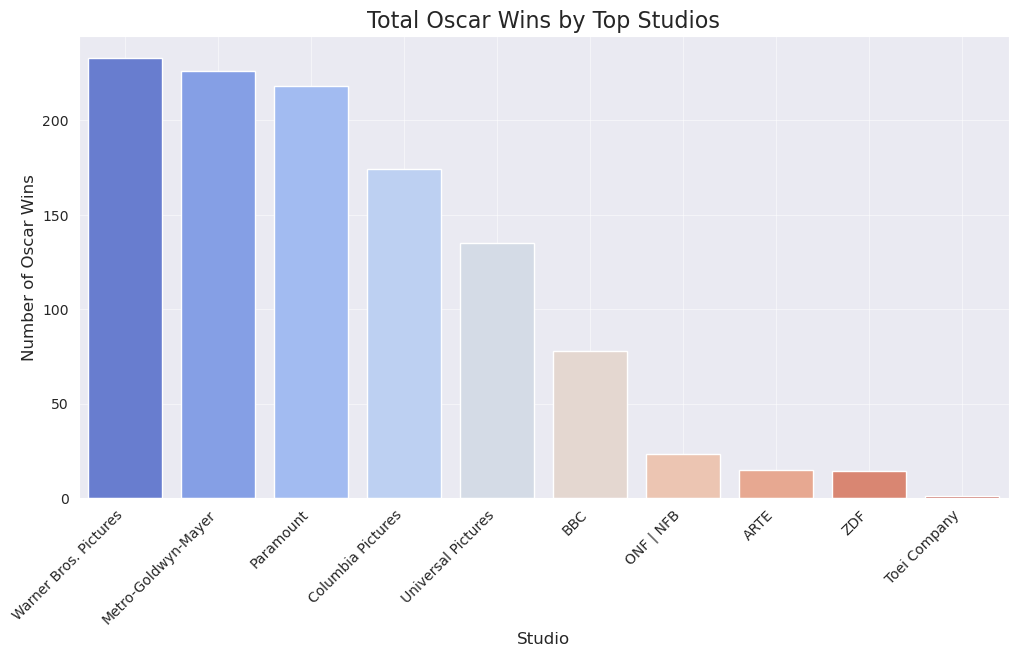

In [234]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_studios_oscar_analysis.sort_values(by='num_oscar_wins', ascending=False),
    x='studio',
    y='num_oscar_wins',
    palette='coolwarm'
)
plt.title('Total Oscar Wins by Top Studios', fontsize=16)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Number of Oscar Wins', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.5)
plt.show()


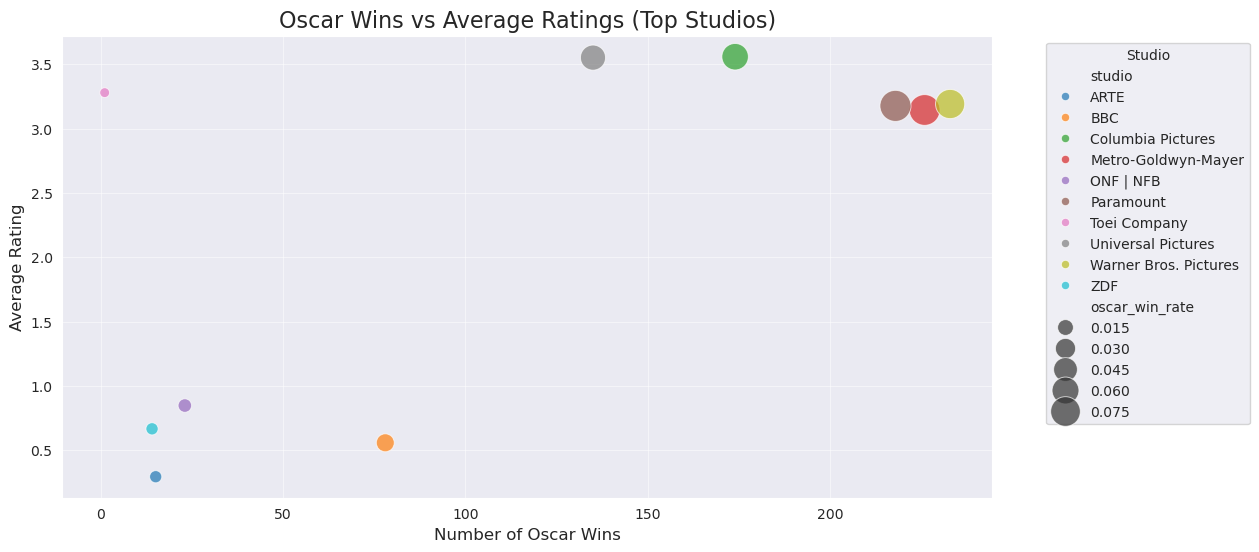

In [235]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=top_studios_oscar_analysis,
    x='num_oscar_wins',
    y='avg_rating',
    size='oscar_win_rate',
    hue='studio',
    sizes=(50, 500),
    alpha=0.7
)
plt.title('Oscar Wins vs Average Ratings (Top Studios)', fontsize=16)
plt.xlabel('Number of Oscar Wins', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Studio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.show()


/tmp/ipykernel_4138/1618598927.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




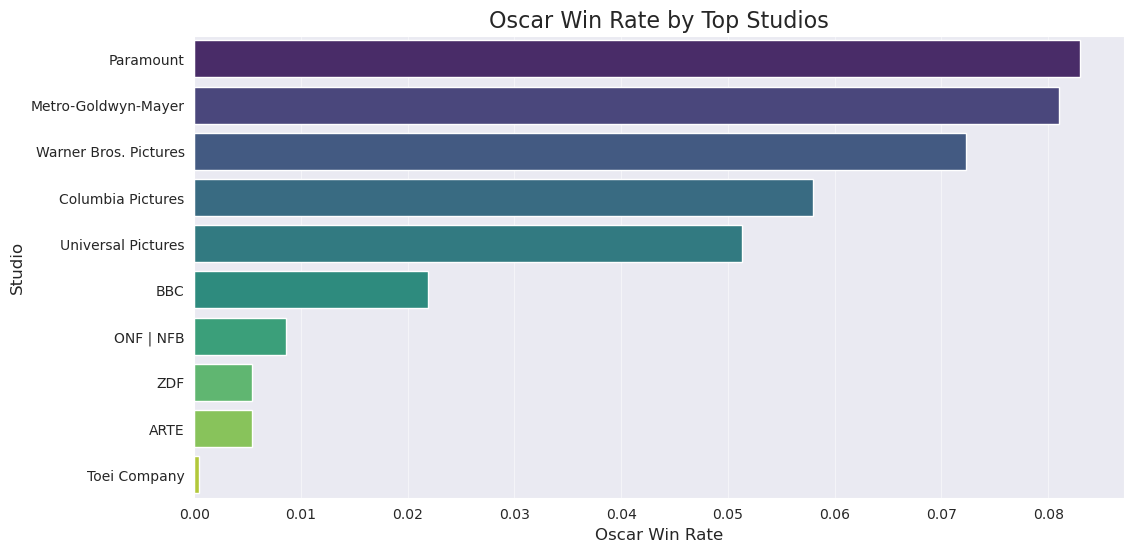

In [236]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_studios_oscar_analysis.sort_values(by='oscar_win_rate', ascending=False),
    x='oscar_win_rate',
    y='studio',
    palette='viridis'
)
plt.title('Oscar Win Rate by Top Studios', fontsize=16)
plt.xlabel('Oscar Win Rate', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.grid(alpha=0.5, axis='x')
plt.show()


/tmp/ipykernel_4138/1692210223.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




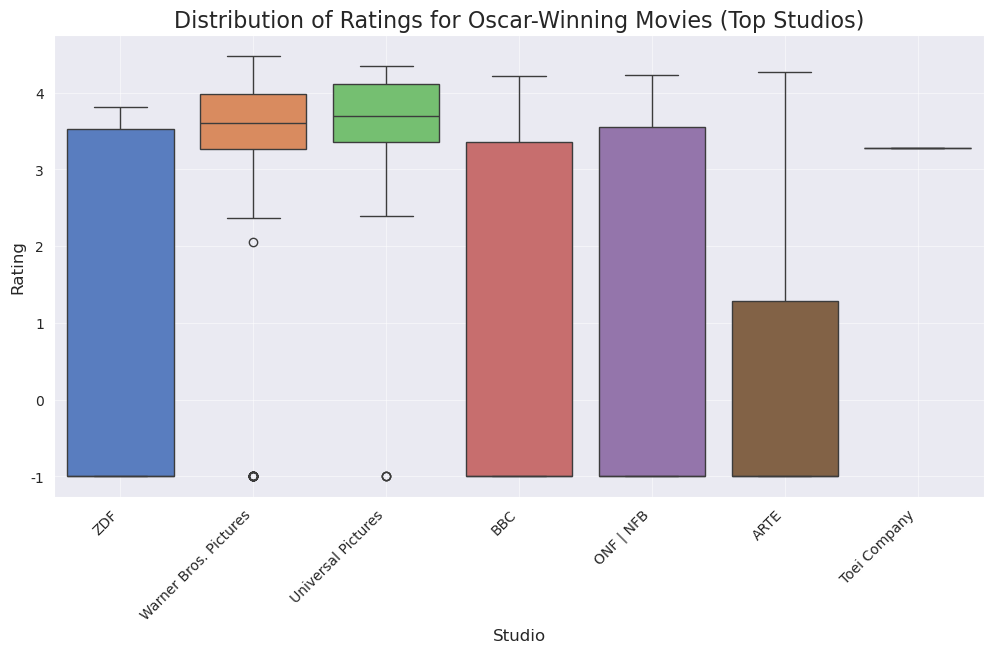

In [237]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=oscar_data_with_studios[oscar_data_with_studios['studio'].isin(top_studios_list) & (oscar_data_with_studios['winner'] == True)],
    x='studio',
    y='rating',
    palette='muted'
)
plt.title('Distribution of Ratings for Oscar-Winning Movies (Top Studios)', fontsize=16)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.5)
plt.show()


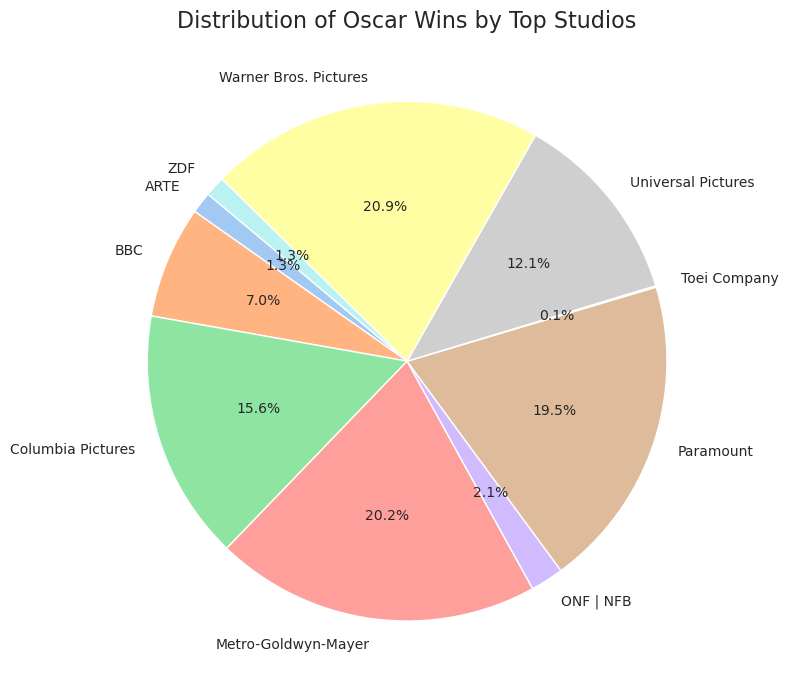

In [238]:
plt.figure(figsize=(8, 8))

plt.pie(
    top_studios_oscar_analysis['num_oscar_wins'],  # Usa solo i top studios
    labels=top_studios_oscar_analysis['studio'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)

plt.title('Distribution of Oscar Wins by Top Studios', fontsize=16)
plt.tight_layout()  # Evita sovrapposizioni
plt.show()
